# Dependencies

In [1]:
pacman::p_load(dplyr, ggplot2)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

# Main

# Create summary tables for control datasets

### Emerson adult

In [5]:
gliphout_emerson <- read.table(paste0(h4hpath, "v9_emerson_adult/gliph_output/int_vdj_v9_emerson_adult_cluster.csv"), sep = ",", header = T)

Warning message in file(file, "rt"):
"cannot open file '/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/v9_emerson_adult/gliph_output/int_vdj_v9_emerson_adult_cluster.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [6]:
gliphin_emerson <- readr::read_rds(paste0(h4hpath, "v9_emerson_adult/gliph_input/int_vdj_gliphinput_v9_emerson_adult.RDS"))

Warning message in readRDS(con, refhook = refhook):
"cannot open file '/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/v9_emerson_adult/gliph_input/int_vdj_gliphinput_v9_emerson_adult.RDS': No such file or directory"


ERROR: Error in readRDS(con, refhook = refhook): cannot open the connection


In [ ]:
# remove columns starting with HLA
gliphout_emerson <- gliphout_emerson[,!grepl("HLA", colnames(gliphout_emerson))]
# no single
gliphout_emerson <- gliphout_emerson[ gliphout_emerson$pattern != "single",]

In [8]:
dim(gliphout_emerson)

[1] 119052     18

In [9]:
gliphout_emerson$subject <- gsub(":.*", "", gliphout_emerson$Sample)

In [10]:
readr::write_rds(gliphout_emerson, file = paste0(datapath, "GLIPH/emerson_adult_cleaned.rds"))

Create a gliph dataframe

In [11]:
gliphdf <- data.frame(gliph = unique(gliphout_emerson$pattern))
rownames(gliphdf) <- gliphdf$gliph

In [12]:
head(gliphdf)

,gliph
,<chr>
SLG%E,SLG%E
S%GGNTE,S%GGNTE
YDTG,YDTG
S%SGANV,S%SGANV
S%TGNTE,S%TGNTE
SVG%NTE,SVG%NTE


In [13]:
head(gliphout_emerson[, c("subject", "Sample")])

,subject,Sample
,<chr>,<chr>
1,MDavis,MDavis:DRB10401
2,MDavis,MDavis:DRB10401
3,MDavis,MDavis:DRB10401
4,Emerson,Emerson:P00014_2108
5,Emerson,Emerson:P00486_45778
6,MDavis,MDavis:DRB10401


In [14]:
names(table(gliphout_emerson$subject[!grepl("Emerson", gliphout_emerson$Sample)]))

[1] "CEF"            "CMV"            "DENV"           "EBV"           
 [5] "HCV"            "HPV"            "HomoSapiens"    "Influenza"     
 [9] "M.tuberculosis" "MCPyV"          "MDavis"         "S-pneumoniae"

In [15]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i],]
# add gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)
gliphdf$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)
gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)
gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [16]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0


In [17]:
colnames(gliphout_emerson)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [18]:
# add number of unique cdr3s for each group
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i], ]
    gliphdf$n_unique_cdr3[i] <- mygliph$number_unique_cdr3[1]
}


In [19]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


Create samples x gliph dataframe

In [20]:
gliphout_emerson$Sample <- gsub("_.*", "", gliphout_emerson$Sample)

In [21]:
mysamples <- names(table(gliphout_emerson$Sample[grepl("Emerson", gliphout_emerson$Sample)]))

In [22]:
head(mysamples)

[1] "Emerson:P00001" "Emerson:P00002" "Emerson:P00004" "Emerson:P00005"
[5] "Emerson:P00006" "Emerson:P00008"

In [23]:
colnames(gliphdf)[2:14]

[1] "CMV"           "EBV"           "HCV"           "Influenza"    
 [5] "HomoSapiens"   "MDavis"        "HPV"           "CEF"          
 [9] "TB"            "MCPyV"         "SP"            "DENV"         
[13] "n_unique_cdr3"

In [24]:
samples_tcr <- as.data.frame(matrix(0, nrow = length(mysamples), ncol = 12, 
dimnames = list(mysamples, colnames(gliphdf)[2:13])) ) 

In [25]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00001,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00002,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00004,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00005,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00008,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# count number of TCRs with annotated gliph groups for each sample
# # eg if 3 TCRs are annotated to a one gliph group with HPV annotation, then count it as 3
for (i in 1:nrow(samples_tcr)) {
    samplegliphs <- gliphout_emerson$pattern[gliphout_emerson$Sample == rownames(samples_tcr)[i]]
    mytab <- as.data.frame(table(gliphout_emerson$subject[gliphout_emerson$pattern %in% samplegliphs]), stringsAsFactors = F)
    mycols <- intersect(colnames(samples_tcr), mytab$Var1)
    samples_tcr[i, mycols] <- mytab$Freq[match(mycols, mytab$Var1)]
}

In [ ]:
# # count number of annotated gliph groups for each sample
# for (i in 1:nrow(gliphdf)) {
#     mygliph <- gliphout_emerson[gliphout_emerson$pattern == rownames(gliphdf)[i], ]
#     sample_subject_tab <- as.data.frame.matrix(table(mygliph$Sample, mygliph$subject))
#     if (sum(grepl("Emerson", rownames(sample_subject_tab))) > 0) {
#         # subset to  samples
#         sample_subject_tab <- sample_subject_tab[grepl("Emerson", rownames(sample_subject_tab)), ]
#         # select same samples in samples_tcr, then match colnames
#         samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] <-
#             samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] + 1
#     }
# }


In [27]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0


In [28]:
gliphin_emerson$subject <- gsub("_.*", "", gliphin_emerson$subject.condition)

In [29]:
head(gliphin_emerson)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
1,CAAAGGSYEQYF,TRBV6-8,NA,NA,MDavis:B5101,1,MDavis:B5101
2,CAAAGTSTDTQYF,TRBV6-8,NA,NA,MDavis:C0602_DRB11501,1,MDavis:C0602
3,CAAAGYDEKLFF,TRBV9-1,NA,NA,MDavis:DQA10102,1,MDavis:DQA10102
4,CAAGGMNTEAFF,TRBV30-1,NA,NA,MDavis:A3101_DQA10301_DRB10701,1,MDavis:A3101
5,CAAGQEGTDTQYF,TRBV29-1,NA,NA,MDavis:B0702_C0702,1,MDavis:B0702
6,CAAGRGLNTEAFF,TRBV29-1,NA,NA,MDavis:B3501_C0401_DRB11501,1,MDavis:B3501


In [30]:
gliphin_emerson_samples <- gliphin_emerson[ grepl("Emerson", gliphin_emerson$subject),]

In [31]:
head(gliphin_emerson_samples)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
21816,CASSRGQGPYEQYF,TRBV06-05,TRBJ02-07,NA,Emerson:P00001_1,39,Emerson:P00001
21817,CAISPASPRGPSTDTQYF,TRBV28-01,TRBJ02-03,NA,Emerson:P00001_2,85,Emerson:P00001
21818,CASSFQDRGRNEQFF,TRBV07-06,TRBJ02-01,NA,Emerson:P00001_3,46,Emerson:P00001
21819,CASSRDRVQETQYF,TRBV06-05,TRBJ02-05,NA,Emerson:P00001_4,53,Emerson:P00001
21820,CASSPGQGYEQYF,TRBV12,TRBJ02-07,NA,Emerson:P00001_5,61,Emerson:P00001
21821,CASSLVTGAGTEAFF,TRBV05-04,TRBJ01-01,NA,Emerson:P00001_6,94,Emerson:P00001


In [32]:
mytab <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(n = n())
mytab1 <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(SumCount = sum(count))


In [33]:
head(mytab1)

subject,SumCount
<chr>,<dbl>
Emerson:P00001,30394
Emerson:P00002,1940
Emerson:P00004,48734
Emerson:P00005,8595
Emerson:P00006,222
Emerson:P00008,5723


In [34]:
samples_tcr$n_cdr3 <- mytab$n[ match(rownames(samples_tcr), mytab$subject) ]
samples_tcr$cdr3_reads <- mytab1$SumCount[ match(rownames(samples_tcr), mytab1$subject) ]

In [35]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723


In [36]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliphout_emerson %>% select(pattern, Sample)))

In [37]:
pat_type <- pat_type[, grepl("Emerson", colnames(pat_type))]

In [38]:
head(pat_type)

,Emerson:P00001,Emerson:P00002,Emerson:P00004,Emerson:P00005,Emerson:P00006,Emerson:P00008,Emerson:P00009,Emerson:P00011,Emerson:P00013,Emerson:P00014,...,Emerson:P00626,Emerson:P00628,Emerson:P00636,Emerson:P00639,Emerson:P00647,Emerson:P00649,Emerson:P00650,Emerson:P00654,Emerson:P00656,Emerson:P00665
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
%AAGYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AANEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
%AAQET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%ADRLNTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%ADSGNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
%ADT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
pat_type[ pat_type > 0] <- 1 # sometimes for one sample there are two CDR3s grouped in one cluster, recode to 1 to count once

In [40]:
# fill n_gliph for each samples
n_gliph <- colSums(pat_type)

In [41]:
samples_tcr$n_gliph <- n_gliph[ match(rownames(samples_tcr), names(n_gliph)) ]

In [42]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394,333
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940,73
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734,521
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595,193
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723,276


In [43]:
head(gliphout_emerson$Sample)

[1] "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401" "Emerson:P00014" 
[5] "Emerson:P00486"  "MDavis:DRB10401"

In [44]:
# get number of unique cdr3s used in gliph for each sample
samples_tcr$n_cdr3ingliph <- NA
samples_tcr$cdr3reads_ingliph <- NA
for (i in 1:nrow(samples_tcr)) {
    mysample <- gliphout_emerson[gliphout_emerson$Sample == rownames(samples_tcr)[i], ]
    samples_tcr$n_cdr3ingliph[i] <- length(unique(mysample$TcRb))
    samples_tcr$cdr3reads_ingliph[i] <- sum(mysample$Freq)
}

In [45]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394,333,150,33353
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940,73,36,1637
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734,521,215,63165
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595,193,97,6399
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723,276,117,5759


In [46]:
samples_tcr$study <- "Emerson_adult"

In [47]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


In [48]:
readr::write_rds(samples_tcr, file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_stat.rds"))
readr::write_rds(gliphdf, file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_stat.rds"))

In [50]:
# check a sample
samples_tcr[10,]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00014,3,3,4,0,15,881,1,0,0,4,0,0,500,26315,512,231,26278,Emerson_adult


In [62]:
temp <- gliphin_emerson[ gliphin_emerson$subject == "Emerson:P00014",]
sum(temp$count) # cdr3_reads
length(unique(temp$CDR3b)) # n_cdr3

temp <- gliphout_emerson[ gliphout_emerson$Sample == "Emerson:P00014",]
sum(temp$Freq) # cdr3reads_ingliph
length(unique(temp$TcRb)) # n_cdr3ingliph

[1] 26315

[1] 500

[1] 26278

[1] 231

In [65]:
samplegliphs <- gliphout_emerson$pattern[ gliphout_emerson$Sample == "Emerson:P00014"]
table(gliphout_emerson$subject[ gliphout_emerson$pattern %in% samplegliphs])


         CMV          EBV      Emerson          HCV          HPV  HomoSapiens 
           3            3         2025            4            1           15 
       MCPyV       MDavis S-pneumoniae 
           4          881            2 

Create summary tables for frequencies

In [66]:
gliphout <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_cleaned.rds"))

In [67]:
# use the previous data
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_stat.rds"))

In [68]:
gliphdf_freq <- gliphdf %>% mutate_all(~NA)
gliphdf_freq$n_unique_cdr3 <- NULL
gliphdf_freq$gliph <- NULL

In [69]:
head(samples_tcr[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252


In [70]:
columns_to_na <- colnames(samples_tcr)[1:12]

samples_tcr_freq <- samples_tcr %>%
  mutate(across(all_of(columns_to_na), ~NA))

In [71]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,222,1,1,68,Emerson_adult
Emerson:P00008,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,5723,276,117,5759,Emerson_adult


In [72]:
names(table(gliphout$subject[!grepl("Emerson", gliphout$Sample)]))

[1] "CEF"            "CMV"            "DENV"           "EBV"           
 [5] "HCV"            "HPV"            "HomoSapiens"    "Influenza"     
 [9] "M.tuberculosis" "MCPyV"          "MDavis"         "S-pneumoniae"

In [73]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SVG%NTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [74]:
for(i in 1:nrow(gliphdf_freq)){

mygliph <- gliphout[gliphout$pattern == rownames(gliphdf_freq)[i],]
# sum Freq of CHP samples if  if mygliph$Sample ciontains CMV
gliphdf_freq$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
# gliphdf_freq$HTLV1[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
}

In [75]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


In [76]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,0,0,0,0,0,1935,0,0,0,0,0,0
S%GGNTE,0,0,0,0,1027,1027,0,0,0,0,0,0
YDTG,0,0,0,0,0,124,0,0,0,0,0,0
S%SGANV,0,0,0,0,0,1147,0,0,0,0,0,0
S%TGNTE,0,0,0,0,0,1347,0,0,0,0,0,0
SVG%NTE,0,0,0,0,0,705,0,0,0,0,0,0


In [77]:
colnames(gliphout)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [78]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,222,1,1,68,Emerson_adult
Emerson:P00008,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,5723,276,117,5759,Emerson_adult


In [79]:
colnames(gliphdf_freq)
colnames(samples_tcr_freq)

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
 [6] "MDavis"      "HPV"         "CEF"         "TB"          "MCPyV"      
[11] "SP"          "DENV"

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "DENV"             
[13] "n_cdr3"            "cdr3_reads"        "n_gliph"          
[16] "n_cdr3ingliph"     "cdr3reads_ingliph" "study"

In [80]:
gliphout$sample_id <- gsub("_.*", "", gliphout$Sample)

In [81]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','MDavis','HPV','CEF','TB','MCPyV','SP','DENV')
# count number of annotated gliph groups for each sample
for (i in 1:nrow(samples_tcr_freq)) {
    mysample <- gliphout[gliphout$sample_id == rownames(samples_tcr_freq)[i], ]
    for (a in myantigens) {
        tmp <- gliphout[gliphout$pattern %in% mysample$pattern, ] # subset to include patterns in my sample
        antigen_gliphs <- tmp$pattern[grepl(a, tmp$subject)] # get antigen gliphs
        samples_tcr_freq[i, a] <- sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])
    }
}


In [82]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68,Emerson_adult
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252,5723,276,117,5759,Emerson_adult


In [83]:
# Replace NA values with 0 in columns
columns_to_fill <- colnames(samples_tcr_freq)[1:12]

samples_tcr_freq[columns_to_fill] <- lapply(samples_tcr_freq[columns_to_fill], function(x) ifelse(is.na(x), 0, x))


In [84]:
head(samples_tcr_freq[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252


In [85]:
table(samples_tcr_freq$study)


Emerson_adult 
          253 

In [86]:
readr::write_rds(samples_tcr_freq, file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_freq_stat.rds"))
readr::write_rds(gliphdf_freq, file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_freq_stat.rds"))

In [95]:
(gliphdf_freq["STG%YG",])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STG%YG,115,0,0,115,0,115,0,0,0,0,0,0


In [96]:
# sanity check
table(gliphout_emerson$subject[gliphout_emerson$pattern == "STG%YG"])
emerson <- gliphout_emerson$Sample[grepl("Emerson", gliphout_emerson$Sample)]
sum(gliphout_emerson$Freq[gliphout_emerson$pattern == "STG%YG" & gliphout_emerson$Sample %in% emerson])
sum(gliphout_emerson$Freq[gliphout_emerson$pattern == "STG%YG"])


      CMV   Emerson Influenza    MDavis 
        1         3         2         6 

[1] 115

[1] 124

In [97]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68,Emerson_adult
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252,5723,276,117,5759,Emerson_adult


In [99]:
# sanity check
mysample <- gliphout_emerson[gliphout_emerson$Sample == "Emerson:P00008", ]
tmp <- gliphout_emerson[gliphout_emerson$pattern %in% mysample$pattern, ] 
antigen_gliphs <- tmp$pattern[grepl("HCV", tmp$subject)]
sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])

[1] 127

In [103]:
# rm(gliphin_emerson)

### Emerson child

In [104]:
gliphout_emerson <- read.table(paste0(h4hpath, "v9_emerson_child/gliph_output/int_vdj_v9_emerson_child_cluster.csv"), sep = ",", header = T)

In [105]:
gliphin_emerson <- readr::read_rds(paste0(h4hpath, "v9_emerson_child/gliph_input/int_vdj_gliphinput_v9_emerson_child.RDS"))

In [106]:
# remove columns starting with HLA
gliphout_emerson <- gliphout_emerson[,!grepl("HLA", colnames(gliphout_emerson))]
# no single
gliphout_emerson <- gliphout_emerson[ gliphout_emerson$pattern != "single",]

In [107]:
dim(gliphout_emerson)

[1] 44157    18

In [108]:
gliphout_emerson$subject <- gsub(":.*", "", gliphout_emerson$Sample)

In [109]:
readr::write_rds(gliphout_emerson, file = paste0(datapath, "GLIPH/emerson_child_cleaned.rds"))

Create a gliph dataframe

In [110]:
gliphdf <- data.frame(gliph = unique(gliphout_emerson$pattern))
rownames(gliphdf) <- gliphdf$gliph

In [111]:
head(gliphdf)

,gliph
,<chr>
SLG%E,SLG%E
S%GSGE,S%GSGE
SLQG%E,SLQG%E
S%SGANV,S%SGANV
S%GGNTE,S%GGNTE
S%TGNTE,S%TGNTE


In [112]:
head(gliphout_emerson[, c("subject", "Sample")])

,subject,Sample
,<chr>,<chr>
1,MDavis,MDavis:DRB10401
2,MDavis,MDavis:DRB10401
3,MDavis,MDavis:DRB10401_DRB11101
4,MDavis,MDavis:DRB10401
5,MDavis,MDavis:DRB10401
6,Emerson,Emerson:P00378_2501


In [113]:
names(table(gliphout_emerson$subject[!grepl("Emerson", gliphout_emerson$Sample)]))

[1] "CEF"            "CMV"            "EBV"            "HCV"           
 [5] "HPV"            "HomoSapiens"    "Influenza"      "M.tuberculosis"
 [9] "MCPyV"          "MDavis"         "S-pneumoniae"

In [114]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i],]
# add gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)
gliphdf$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)
gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)
gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [115]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0
S%GSGE,S%GSGE,0,0,0,0,0,32,0,0,0,0,0,0
SLQG%E,SLQG%E,0,0,0,0,0,30,1,0,0,0,0,0
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0


In [116]:
colnames(gliphout_emerson)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [117]:
# add number of unique cdr3s for each group
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i], ]
    gliphdf$n_unique_cdr3[i] <- mygliph$number_unique_cdr3[1]
}


In [118]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,40
S%GSGE,S%GSGE,0,0,0,0,0,32,0,0,0,0,0,0,33
SLQG%E,SLQG%E,0,0,0,0,0,30,1,0,0,0,0,0,30
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,34
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,40
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,34


Create samples x gliph dataframe

In [119]:
gliphout_emerson$Sample <- gsub("_.*", "", gliphout_emerson$Sample)

In [120]:
mysamples <- names(table(gliphout_emerson$Sample[grepl("Emerson", gliphout_emerson$Sample)]))

In [121]:
head(mysamples)

[1] "Emerson:P00015" "Emerson:P00023" "Emerson:P00091" "Emerson:P00092"
[5] "Emerson:P00171" "Emerson:P00183"

In [122]:
samples_tcr <- as.data.frame(matrix(0, nrow = length(mysamples), ncol = 12, 
dimnames = list(mysamples, colnames(gliphdf)[2:13])) ) 

In [123]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00015,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00023,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00091,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00092,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00171,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00183,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
# count number of TCRs with annotated gliph groups for each sample
# # eg if 3 TCRs are annotated to a one gliph group with HPV annotation, then count it as 3
for (i in 1:nrow(samples_tcr)) {
    samplegliphs <- gliphout_emerson$pattern[gliphout_emerson$Sample == rownames(samples_tcr)[i]]
    mytab <- as.data.frame(table(gliphout_emerson$subject[gliphout_emerson$pattern %in% samplegliphs]), stringsAsFactors = F)
    mycols <- intersect(colnames(samples_tcr), mytab$Var1)
    samples_tcr[i, mycols] <- mytab$Freq[match(mycols, mytab$Var1)]
}

In [ ]:
# # count number of annotated gliph groups for each sample
# for (i in 1:nrow(gliphdf)) {
#     mygliph <- gliphout_emerson[gliphout_emerson$pattern == rownames(gliphdf)[i], ]
#     sample_subject_tab <- as.data.frame.matrix(table(mygliph$Sample, mygliph$subject))
#     if (sum(grepl("Emerson", rownames(sample_subject_tab))) > 0) {
#         # subset to  samples
#         sample_subject_tab <- sample_subject_tab[grepl("Emerson", rownames(sample_subject_tab)), ]
#         # select same samples in samples_tcr, then match colnames
#         samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] <-
#             samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] + 1
#     }
# }


In [125]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0


In [126]:
gliphin_emerson$subject <- gsub("_.*", "", gliphin_emerson$subject.condition)

In [127]:
head(gliphin_emerson)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
1,CAAAGGSYEQYF,TRBV6-8,NA,NA,MDavis:B5101,1,MDavis:B5101
2,CAAAGTSTDTQYF,TRBV6-8,NA,NA,MDavis:C0602_DRB11501,1,MDavis:C0602
3,CAAAGYDEKLFF,TRBV9-1,NA,NA,MDavis:DQA10102,1,MDavis:DQA10102
4,CAAGGMNTEAFF,TRBV30-1,NA,NA,MDavis:A3101_DQA10301_DRB10701,1,MDavis:A3101
5,CAAGQEGTDTQYF,TRBV29-1,NA,NA,MDavis:B0702_C0702,1,MDavis:B0702
6,CAAGRGLNTEAFF,TRBV29-1,NA,NA,MDavis:B3501_C0401_DRB11501,1,MDavis:B3501


In [128]:
gliphin_emerson_samples <- gliphin_emerson[ grepl("Emerson", gliphin_emerson$subject),]

In [129]:
head(gliphin_emerson_samples)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
21816,CASSLFGTLNEQFF,TRBV07-02,TRBJ02-01,NA,Emerson:P00015_1,34,Emerson:P00015
21817,CASSSGQGGDEQFF,TRBV05-04,TRBJ02-01,NA,Emerson:P00015_2,23,Emerson:P00015
21818,CASSGDRRVGQPQHF,TRBV19-01,TRBJ01-05,NA,Emerson:P00015_3,27,Emerson:P00015
21819,CASSDSPDYEQYF,TRBV06-01,TRBJ02-07,NA,Emerson:P00015_4,56,Emerson:P00015
21820,CASSYSTSLSSYEQYF,TRBV06,TRBJ02-07,NA,Emerson:P00015_5,43,Emerson:P00015
21821,CASSDDRGRSEKLFF,TRBV25-01,TRBJ01-04,NA,Emerson:P00015_6,33,Emerson:P00015


In [130]:
mytab <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(n = n())
mytab1 <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(SumCount = sum(count))

In [131]:
head(mytab1)

subject,SumCount
<chr>,<dbl>
Emerson:P00015,10948
Emerson:P00023,2726
Emerson:P00091,8596
Emerson:P00092,4968
Emerson:P00171,46
Emerson:P00183,4797


In [132]:
samples_tcr$n_cdr3 <- mytab$n[ match(rownames(samples_tcr), mytab$subject) ]
samples_tcr$cdr3_reads <- mytab1$SumCount[ match(rownames(samples_tcr), mytab1$subject) ]

In [133]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0,314,10948
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0,82,2726
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0,504,8596
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0,205,4968
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0,3,46
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0,252,4797


In [134]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliphout_emerson %>% select(pattern, Sample)))

In [135]:
pat_type <- pat_type[, grepl("Emerson", colnames(pat_type))]

In [136]:
head(pat_type)

,Emerson:P00015,Emerson:P00023,Emerson:P00091,Emerson:P00092,Emerson:P00171,Emerson:P00183,Emerson:P00185,Emerson:P00245,Emerson:P00307,Emerson:P00332,...,Emerson:P00397,Emerson:P00404,Emerson:P00423,Emerson:P00425,Emerson:P00446,Emerson:P00454,Emerson:P00540,Emerson:P00564,Emerson:P00629,Emerson:P00634
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
%AAGYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
%AGGAYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGGGYE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGGNTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGGPNTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AGGPTDT,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [137]:
pat_type[ pat_type > 0] <- 1 # sometimes for one sample there are two CDR3s grouped in one cluster, recode to 1 to count once

In [138]:
# fill n_gliph for each samples
n_gliph <- colSums(pat_type)

In [139]:
samples_tcr$n_gliph <- n_gliph[ match(rownames(samples_tcr), names(n_gliph)) ]

In [140]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0,314,10948,168
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0,82,2726,41
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0,504,8596,275
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0,205,4968,96
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0,3,46,2
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0,252,4797,147


In [141]:
head(gliphout_emerson$Sample)

[1] "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401"
[5] "MDavis:DRB10401" "Emerson:P00378"

In [142]:
# get number of unique cdr3s used in gliph for each sample
samples_tcr$n_cdr3ingliph <- NA
samples_tcr$cdr3reads_ingliph <- NA
for (i in 1:nrow(samples_tcr)) {
    mysample <- gliphout_emerson[gliphout_emerson$Sample == rownames(samples_tcr)[i], ]
    samples_tcr$n_cdr3ingliph[i] <- length(unique(mysample$TcRb))
    samples_tcr$cdr3reads_ingliph[i] <- sum(mysample$Freq)
}


In [143]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0,314,10948,168,91,6341
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0,82,2726,41,24,1405
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0,504,8596,275,148,5119
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0,205,4968,96,55,2370
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0,3,46,2,1,26
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0,252,4797,147,86,3061


In [144]:
samples_tcr$study <- "Emerson_child"

In [145]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,40
S%GSGE,S%GSGE,0,0,0,0,0,32,0,0,0,0,0,0,33
SLQG%E,SLQG%E,0,0,0,0,0,30,1,0,0,0,0,0,30
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,34
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,40
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,34


In [146]:
readr::write_rds(samples_tcr, file = paste0(datapath, "GLIPH/emerson_child_samples_gliphannot_stat.rds"))
readr::write_rds(gliphdf, file = paste0(datapath, "GLIPH/emerson_child_gliphannot_stat.rds"))

In [151]:
# check a sample
samples_tcr[15,]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00425,8,0,1,1,7,341,0,0,0,3,0,0,276,6656,170,100,4660,Emerson_child


In [152]:
temp <- gliphin_emerson[ gliphin_emerson$subject == "Emerson:P00425",]
sum(temp$count) # cdr3_reads
length(unique(temp$CDR3b)) # n_cdr3

temp <- gliphout_emerson[ gliphout_emerson$Sample == "Emerson:P00425",]
sum(temp$Freq) # cdr3reads_ingliph
length(unique(temp$TcRb)) # n_cdr3ingliph

[1] 6656

[1] 276

[1] 4660

[1] 100

In [153]:
samplegliphs <- gliphout_emerson$pattern[ gliphout_emerson$Sample == "Emerson:P00425"]
table(gliphout_emerson$subject[ gliphout_emerson$pattern %in% samplegliphs])


         CMV      Emerson          HCV  HomoSapiens    Influenza        MCPyV 
           8          244            1            7            1            3 
      MDavis S-pneumoniae 
         341            1 

In [154]:
ls()

[1] "a"                       "addjurkat.fx"           
 [3] "age_pal"                 "align_plots1"           
 [5] "antigen_gliphs"          "calculate_delta.fx"     
 [7] "cohort_col"              "columns_to_fill"        
 [9] "columns_to_na"           "cycle_col"              
[11] "datapath"                "delta_basespiderplot.fx"
[13] "emerson"                 "gitpath"                
[15] "gliphdf"                 "gliphdf_freq"           
[17] "gliphin_emerson"         "gliphin_emerson_samples"
[19] "gliphout"                "gliphout_emerson"       
[21] "group_col"               "h4hpath"                
[23] "histdenp"                "histp"                  
[25] "i"                       "lsmeans_df.fx"          
[27] "manifestpath"            "message_parallel"       
[29] "myantigens"              "myaxis"                 
[31] "mycols"                  "mygliph"                
[33] "myplot"                  "mysample"               
[35] "mysamples"               "mytab"                  
[37] "mytab1"                  "n_gliph"                
[39] "pat_type"                "plotpath"               
[41] "round_and_format"        "safe_mclapply"          
[43] "samplegliphs"            "samples_tcr"            
[45] "samples_tcr_freq"        "sampletags_columns"     
[47] "temp"                    "text_matrix"            
[49] "toString_onefle.fx"      "type_col"

In [160]:
# rm(mysamples)

Create summary tables for frequencies

In [161]:
gliphout <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_cleaned.rds"))

In [162]:
# use the previous data
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_gliphannot_stat.rds"))

In [163]:
gliphdf_freq <- gliphdf %>% mutate_all(~NA)
gliphdf_freq$n_unique_cdr3 <- NULL
gliphdf_freq$gliph <- NULL

In [164]:
head(samples_tcr[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0,314
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0,82
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0,504
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0,205
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0,3
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0,252


In [165]:
colnames(samples_tcr)[1:12]

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
 [6] "MDavis"      "HPV"         "CEF"         "TB"          "MCPyV"      
[11] "SP"          "DENV"

In [166]:
columns_to_na <- colnames(samples_tcr)[1:12]

samples_tcr_freq <- samples_tcr %>%
  mutate(across(all_of(columns_to_na), ~NA))

In [167]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00015,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,10948,168,91,6341,Emerson_child
Emerson:P00023,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,2726,41,24,1405,Emerson_child
Emerson:P00091,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,8596,275,148,5119,Emerson_child
Emerson:P00092,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,4968,96,55,2370,Emerson_child
Emerson:P00171,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,46,2,1,26,Emerson_child
Emerson:P00183,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,4797,147,86,3061,Emerson_child


In [168]:
names(table(gliphout$subject[!grepl("Emerson", gliphout$Sample)]))

[1] "CEF"            "CMV"            "EBV"            "HCV"           
 [5] "HPV"            "HomoSapiens"    "Influenza"      "M.tuberculosis"
 [9] "MCPyV"          "MDavis"         "S-pneumoniae"

In [169]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GSGE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SLQG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [170]:
for(i in 1:nrow(gliphdf_freq)){

mygliph <- gliphout[gliphout$pattern == rownames(gliphdf_freq)[i],]
# sum Freq of CHP samples if  if mygliph$Sample ciontains CMV
gliphdf_freq$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
# gliphdf_freq$HTLV1[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
# gliphdf_freq$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
}

In [171]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,40
S%GSGE,S%GSGE,0,0,0,0,0,32,0,0,0,0,0,0,33
SLQG%E,SLQG%E,0,0,0,0,0,30,1,0,0,0,0,0,30
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,34
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,40
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,34


In [172]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
SLG%E,0,0,0,0,0,147,0,0,0,0,0,NA
S%GSGE,0,0,0,0,0,19,0,0,0,0,0,NA
SLQG%E,0,0,0,0,0,0,0,0,0,0,0,NA
S%SGANV,0,0,0,0,0,41,0,0,0,0,0,NA
S%GGNTE,0,0,0,0,164,164,0,0,0,0,0,NA
S%TGNTE,0,0,0,0,0,89,0,0,0,0,0,NA


In [173]:
colnames(gliphout)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [174]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00015,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,10948,168,91,6341,Emerson_child
Emerson:P00023,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,2726,41,24,1405,Emerson_child
Emerson:P00091,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,8596,275,148,5119,Emerson_child
Emerson:P00092,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,4968,96,55,2370,Emerson_child
Emerson:P00171,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,46,2,1,26,Emerson_child
Emerson:P00183,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,4797,147,86,3061,Emerson_child


In [175]:
colnames(gliphdf_freq)
colnames(samples_tcr_freq)

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
 [6] "MDavis"      "HPV"         "CEF"         "TB"          "MCPyV"      
[11] "SP"          "DENV"

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "DENV"             
[13] "n_cdr3"            "cdr3_reads"        "n_gliph"          
[16] "n_cdr3ingliph"     "cdr3reads_ingliph" "study"

In [176]:
gliphout$sample_id <- gsub("_.*", "", gliphout$Sample)

In [177]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00015,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,10948,168,91,6341,Emerson_child
Emerson:P00023,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,2726,41,24,1405,Emerson_child
Emerson:P00091,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,8596,275,148,5119,Emerson_child
Emerson:P00092,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,4968,96,55,2370,Emerson_child
Emerson:P00171,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,46,2,1,26,Emerson_child
Emerson:P00183,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,4797,147,86,3061,Emerson_child


In [178]:
head(gliphout$sample_id)

[1] "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401"
[5] "MDavis:DRB10401" "Emerson:P00378"

In [179]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','MDavis','HPV','CEF','TB','MCPyV','SP','DENV')
# count number of annotated gliph groups for each sample
for (i in 1:nrow(samples_tcr_freq)) {
    mysample <- gliphout[gliphout$sample_id == rownames(samples_tcr_freq)[i], ]
    for (a in myantigens) {
        tmp <- gliphout[gliphout$pattern %in% mysample$pattern, ] # subset to include patterns in my sample
        antigen_gliphs <- tmp$pattern[grepl(a, tmp$subject)] # get antigen gliphs
        samples_tcr_freq[i, a] <- sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])
    }
}


In [180]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00015,90,82,49,0,279,5138,26,0,0,0,0,0,314,10948,168,91,6341,Emerson_child
Emerson:P00023,0,0,0,0,35,1104,0,0,0,0,0,0,82,2726,41,24,1405,Emerson_child
Emerson:P00091,123,42,58,0,378,4029,30,14,0,83,0,0,504,8596,275,148,5119,Emerson_child
Emerson:P00092,86,33,0,16,129,2094,17,21,0,68,0,0,205,4968,96,55,2370,Emerson_child
Emerson:P00171,0,0,0,0,0,26,0,0,0,0,0,0,3,46,2,1,26,Emerson_child
Emerson:P00183,39,107,22,0,138,2669,22,0,0,23,0,0,252,4797,147,86,3061,Emerson_child


In [181]:
# Replace NA values with 0 in columns
columns_to_fill <- colnames(samples_tcr_freq)[1:12]

samples_tcr_freq[columns_to_fill] <- lapply(samples_tcr_freq[columns_to_fill], function(x) ifelse(is.na(x), 0, x))


In [182]:
head(samples_tcr_freq[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00015,90,82,49,0,279,5138,26,0,0,0,0,0,314
Emerson:P00023,0,0,0,0,35,1104,0,0,0,0,0,0,82
Emerson:P00091,123,42,58,0,378,4029,30,14,0,83,0,0,504
Emerson:P00092,86,33,0,16,129,2094,17,21,0,68,0,0,205
Emerson:P00171,0,0,0,0,0,26,0,0,0,0,0,0,3
Emerson:P00183,39,107,22,0,138,2669,22,0,0,23,0,0,252


In [183]:
table(samples_tcr_freq$study)


Emerson_child 
           21 

In [188]:
samples_tcr_freq["Emerson:P00378",]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00378,142,121,240,28,914,16540,101,27,0,160,0,0,1268,44860,673,387,20905,Emerson_child


In [189]:
# sanity check
mysample <- gliphout_emerson[gliphout_emerson$Sample == "Emerson:P00378", ]
tmp <- gliphout_emerson[gliphout_emerson$pattern %in% mysample$pattern, ] 
antigen_gliphs <- tmp$pattern[grepl("EBV", tmp$subject)]
sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])

[1] 121

In [190]:
readr::write_rds(samples_tcr_freq, file = paste0(datapath, "GLIPH/emerson_child_samples_gliphannot_freq_stat.rds"))
readr::write_rds(gliphdf_freq, file = paste0(datapath, "GLIPH/emerson_child_gliphannot_freq_stat.rds"))

# chi-square

In [191]:
samples_tcr_int <- readr::read_rds(file = paste0(datapath, "GLIPH/int_samples_gliphannot_stat.rds"))
gliphdf_int <- readr::read_rds(file = paste0(datapath, "GLIPH/gliphannot_stat.rds"))

In [192]:
samples_tcr_emersonadult <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_stat.rds"))
gliphdf_emerson_adult <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_stat.rds"))

In [193]:
samples_tcr_emersonchild <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_samples_gliphannot_stat.rds"))
gliphdf_emerson_child <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_gliphannot_stat.rds"))

contingency table for baseline samples and healthy controls

INt

In [194]:
samples_tcr_pbmc <- samples_tcr_int[ grepl("PBMC", rownames(samples_tcr_int)),]
samples_tcr_pbmc <- samples_tcr_pbmc[ !grepl("X00", rownames(samples_tcr_pbmc)),]
samples_tcr_pbmc01 <- samples_tcr_pbmc[ grepl("X01", rownames(samples_tcr_pbmc)),]

In [195]:
# pivot_longer
samples_tcr_pbmc01$sample_id <- rownames(samples_tcr_pbmc01)
samples_tcr_pbmc01_long <- tidyr::pivot_longer(samples_tcr_pbmc01, cols = c(1:13), names_to = "antigen", values_to = "n")

In [196]:
samples_tcr_pbmc01_long <- samples_tcr_pbmc01_long[ samples_tcr_pbmc01_long$n > 0,]

In [197]:
tab_int <- as.data.frame.matrix(table(samples_tcr_pbmc01_long$cancergroup, 
samples_tcr_pbmc01_long$antigen))

In [198]:
# remove mdavis
tab_int <- tab_int[,!grepl("MDavis", colnames(tab_int))]
tab_int <- tab_int[,!grepl("CEF", colnames(tab_int))]
tab_int <- tab_int[,!grepl("DENV", colnames(tab_int))]

In [199]:
head(tab_int)

,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Leukemia,12,11,11,9,16,4,9
Lymphoma,4,4,2,1,5,1,3
Solidtumors,9,9,8,5,12,4,4
T-cellmalignancies,1,1,0,1,2,0,1


Child

In [200]:
dim(samples_tcr_emersonchild)

[1] 21 18

In [201]:
head(samples_tcr_emersonchild)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00015,2,2,1,0,7,387,1,0,0,0,0,0,314,10948,168,91,6341,Emerson_child
Emerson:P00023,0,0,0,0,1,111,0,0,0,0,0,0,82,2726,41,24,1405,Emerson_child
Emerson:P00091,9,3,2,0,23,637,1,1,0,7,0,0,504,8596,275,148,5119,Emerson_child
Emerson:P00092,4,1,0,1,5,253,1,1,0,2,0,0,205,4968,96,55,2370,Emerson_child
Emerson:P00171,0,0,0,0,0,2,0,0,0,0,0,0,3,46,2,1,26,Emerson_child
Emerson:P00183,3,3,1,0,8,452,1,0,0,2,0,0,252,4797,147,86,3061,Emerson_child


In [202]:
# pivot_longer
samples_tcr_emersonchild$sample_id <- rownames(samples_tcr_emersonchild)
samples_tcr_child_long <- tidyr::pivot_longer(samples_tcr_emersonchild, cols = c(1:12), names_to = "antigen", values_to = "n")

In [203]:
# remove 0
samples_tcr_child_long <- samples_tcr_child_long[samples_tcr_child_long$n > 0,]

In [204]:
tab_child <- as.data.frame.matrix(table(samples_tcr_child_long$study, 
samples_tcr_child_long$antigen))

In [205]:
head(tab_child)

,CEF,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV,MDavis
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Emerson_child,6,14,12,13,9,18,4,12,21


In [206]:
# remove mdavis
tab_child <- tab_child[,!grepl("MDavis", colnames(tab_child))]
tab_child <- tab_child[,!grepl("CEF", colnames(tab_child))]

In [207]:
head(tab_child)

,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Emerson_child,14,12,13,9,18,4,12


Adult

In [208]:
# pivot_longer
samples_tcr_emersonadult$sample_id <- rownames(samples_tcr_emersonadult)
samples_tcr_adult_long <- tidyr::pivot_longer(samples_tcr_emersonadult, cols = c(1:12), names_to = "antigen", values_to = "n")

In [209]:
dim(samples_tcr_emersonadult)

[1] 253  19

In [210]:
# remove 0
samples_tcr_adult_long <- samples_tcr_adult_long[samples_tcr_adult_long$n > 0,]

In [211]:
tab_adult <- as.data.frame.matrix(table(samples_tcr_adult_long$study, 
samples_tcr_adult_long$antigen))

In [212]:
# remove mdavis
tab_adult <- tab_adult[,!grepl("MDavis", colnames(tab_adult))]
tab_adult <- tab_adult[,!grepl("CEF", colnames(tab_adult))]
tab_adult <- tab_adult[,!grepl("DENV", colnames(tab_adult))]


In [213]:
head(tab_adult)

,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Emerson_adult,185,146,148,93,200,46,135


bind all together

In [214]:
all_tab <- rbind(tab_int, tab_child, tab_adult)

In [215]:
adultcount <- as.data.frame(table(samples_tcr_emersonadult$study))
childcount <- as.data.frame(table(samples_tcr_emersonchild$study))
intcount <- as.data.frame(table(samples_tcr_pbmc01$cancergroup))


In [216]:
# remove Tcells becasue only two samples
all_tab <- all_tab[!grepl("T-cellmalignancies", rownames(all_tab)),]

In [217]:
intcount

Var1,Freq
<fct>,<int>
Leukemia,22
Lymphoma,5
Solidtumors,13
T-cellmalignancies,2


In [218]:
all_tab$n <- NA
all_tab$n[ grepl("Emerson_adult", rownames(all_tab))] <- adultcount$Freq
all_tab$n[ grepl("Emerson_child", rownames(all_tab))] <- childcount$Freq
all_tab$n[ grepl("Leukemia", rownames(all_tab))] <- intcount$Freq[intcount$Var1 == "Leukemia"]
all_tab$n[ grepl("Lymphoma", rownames(all_tab))] <- intcount$Freq[intcount$Var1 == "Lymphoma"]
all_tab$n[ grepl("Solidtumors", rownames(all_tab))] <- intcount$Freq[intcount$Var1 == "Solidtumors"]

In [219]:
all_tab

,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV,n
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Leukemia,12,11,11,9,16,4,9,22
Lymphoma,4,4,2,1,5,1,3,5
Solidtumors,9,9,8,5,12,4,4,13
Emerson_child,14,12,13,9,18,4,12,21
Emerson_adult,185,146,148,93,200,46,135,253


In [220]:
mymat <- as.data.frame(matrix(NA, nrow = 0, ncol = 6) )
colnames(mymat) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

In [221]:
for (c in c("Leukemia", "Lymphoma", "Solidtumors")) {
  print(c)

  for (v in c("CMV", "EBV", "HCV", "HPV", "Influenza", "MCPyV", "HomoSapiens")) {
    print(v)
all_tab$others <- NA
all_tab[c, "others"] <- all_tab[c,"n"] - all_tab[c,v] 
all_tab["Emerson_adult", "others"] <- all_tab["Emerson_adult","n"] - all_tab["Emerson_adult",v] 
contingency_table <- all_tab[c(c, "Emerson_adult"), c(v, "others")]

if( nrow(contingency_table) == 1) next
    c1 <- fisher.test(contingency_table)
    mymat_c <- as.data.frame(matrix(NA, nrow = 1, ncol = 6))
    colnames(mymat_c) <- c("Antigen", "Cancer", "p", "OR", "Lower", "Upper")

    mymat_c$Antigen[1] <- v
    mymat_c$Cancer[1] <- c
    mymat_c$p[1] <- c1$p.value
    mymat_c$OR[1] <- c1$estimate
    mymat_c$Lower[1] <- c1$conf.int[1]
    mymat_c$Upper[1] <- c1$conf.int[2]
    mymat <- rbind(mymat, mymat_c[1, ])

  } # end of virus loop
} # end of cancer loop

[1] "Leukemia"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "Lymphoma"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"
[1] "Solidtumors"
[1] "CMV"
[1] "EBV"
[1] "HCV"
[1] "HPV"
[1] "Influenza"
[1] "MCPyV"
[1] "HomoSapiens"


In [222]:
mymat$padj <- p.adjust(mymat$p, method = "fdr")
mymat[ order(mymat$padj),]

,Antigen,Cancer,p,OR,Lower,Upper,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CMV,Leukemia,0.08300485,0.4425654,0.166485349,1.200471,1
2,EBV,Leukemia,0.50764399,0.7337276,0.277010151,1.942978,1
3,HCV,Leukemia,0.50242750,0.7103739,0.268147120,1.881465,1
4,HPV,Leukemia,0.81853682,1.1902859,0.431321490,3.143704,1
5,Influenza,Leukemia,1.00000000,1.0000000,0.235111022,3.236063,1
6,MCPyV,Leukemia,0.27585273,0.6062405,0.220223625,1.596292,1
7,HomoSapiens,Leukemia,0.58718011,0.7076339,0.247612629,2.318432,1
8,CMV,Lymphoma,1.00000000,1.4682143,0.141998128,73.434455,1
9,EBV,Lymphoma,0.40330543,2.9210220,0.283818879,145.595952,1


In [227]:
all_tab$others <- NULL
all_tab$n <- NULL

In [228]:
all_tab

,CMV,EBV,HCV,HPV,HomoSapiens,Influenza,MCPyV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Leukemia,12,11,11,9,16,4,9
Lymphoma,4,4,2,1,5,1,3
Solidtumors,9,9,8,5,12,4,4
Emerson_child,14,12,13,9,18,4,12
Emerson_adult,185,146,148,93,200,46,135


In [231]:
chisq <- chisq.test(all_tab[ !grepl("Emerson_Adult", rownames(all_tab)),])

Warning message in chisq.test(all_tab[!grepl("Emerson_Adult", rownames(all_tab)), :
"Chi-squared approximation may be incorrect"


In [232]:
chisq


	Pearson's Chi-squared test

data:  all_tab[!grepl("Emerson_Adult", rownames(all_tab)), ]
X-squared = 5.2853, df = 24, p-value = 1


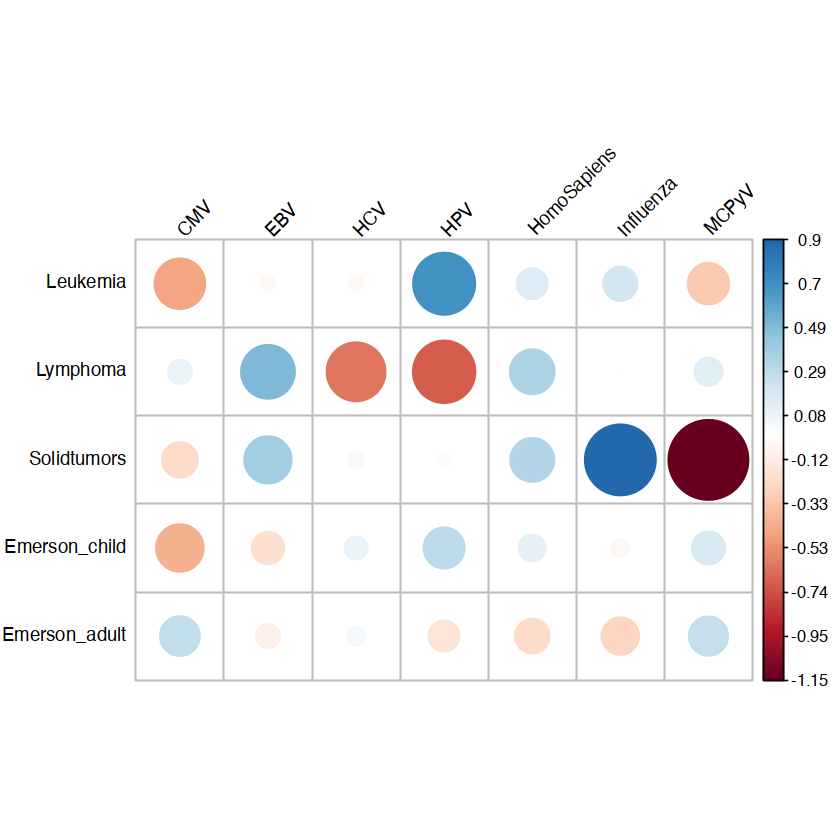

In [233]:
corrplot::corrplot(chisq$residuals, is.cor = FALSE,
tl.pos = "lt", tl.cex = 0.9, tl.col = "black", tl.srt = 45)

In [234]:
pdf(paste0(plotpath, "antigen_enrichment_chisq.pdf"), width = 10, height = 10)
corrplot::corrplot(chisq$residuals,
    is.cor = FALSE,
    tl.pos = "lt", tl.cex = 0.9, tl.col = "black", tl.srt = 45
)
dev.off()

pdf 
  2

# Comparing clonal fraction between cancers and healthy subjects

In [5]:
int_samples_tcr_freq <- readr::read_rds(file = paste0(datapath, "GLIPH/int_samples_gliphannot_freq_stat.rds"))

In [6]:
adult_samples_tcr_freq <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_freq_stat.rds"))

In [7]:
child_samples_tcr_freq <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_child_samples_gliphannot_freq_stat.rds"))

In [8]:
int_samples_tcr_freq_pbmc <- int_samples_tcr_freq[ int_samples_tcr_freq$sampletype == "PBMC",]
int_samples_tcr_freq_pbmc <- int_samples_tcr_freq_pbmc[ !grepl("X00", rownames(int_samples_tcr_freq_pbmc)),]
int_samples_tcr_freq_pbmc01 <- int_samples_tcr_freq_pbmc[ grepl("X01", rownames(int_samples_tcr_freq_pbmc)),]

In [9]:
myantigens <- colnames(int_samples_tcr_freq_pbmc01)[1:11]

In [10]:
myantigens <- myantigens[ !myantigens %in% c("MDavis", "CEF", "TB", "SP")]

In [11]:
myantigens

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
[6] "HPV"         "MCPyV"

In [12]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))
load(file = paste0(datapath, "Adaptivedatasets/allAdaptive.RData"))

In [13]:
colnames(int_samples_tcr_freq_pbmc01)

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "HTLV1"            
[13] "DENV"              "n_cdr3"            "cdr3_reads"       
[16] "n_gliph"           "n_cdr3ingliph"     "cdr3reads_ingliph"
[19] "cancergroup"       "cycle"             "sampletype"       
[22] "cyclenum"          "Patient"           "Age"

In [14]:
int_samples_tcr_freq_pbmc01$Relapse <- meta_div$Relapse[ match(int_samples_tcr_freq_pbmc01$Patient, meta_div$Patient)]

In [15]:
head(int_samples_tcr_freq_pbmc01)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,cancergroup,cycle,sampletype,cyclenum,Patient,Age,Relapse
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>
Leukemia:CHP_347_X01-PBMC,0,0,46,74,63,2824,0,0,0,0,...,135,63,5256,Leukemia,X01,PBMC,1,CHP_347,13,0
Leukemia:CHP_349_X01-PBMC,0,0,0,0,0,603,0,0,0,0,...,11,5,841,Leukemia,X01,PBMC,1,CHP_349,17,1
Leukemia:CHP_352_X01-PBMC,0,0,0,0,0,72,0,0,0,0,...,5,2,101,Leukemia,X01,PBMC,1,CHP_352,17,0
Leukemia:CHP_353_X01-PBMC,18,0,13,0,16,866,21,0,0,3,...,163,82,1502,Leukemia,X01,PBMC,1,CHP_353,6,1
Leukemia:CHP_354_X01-PBMC,0,0,0,0,0,17,17,0,0,0,...,5,1,85,Leukemia,X01,PBMC,1,CHP_354,9,0
Leukemia:CHP_355_X01-PBMC,0,0,0,0,31,35,0,0,0,0,...,8,4,157,Leukemia,X01,PBMC,1,CHP_355,3,0


In [16]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    int_samples_tcr_freq_pbmc01[[myvar]] <- NA
    int_samples_tcr_freq_pbmc01[[myvar]] <- int_samples_tcr_freq_pbmc01[,myantigens[i]] / int_samples_tcr_freq_pbmc01$cdr3_reads
}

In [17]:
int_samples_tcr_freq_pbmc01$study <- int_samples_tcr_freq_pbmc01$cancergroup

In [18]:
colnames(int_samples_tcr_freq_pbmc01)

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "HTLV1"            
[13] "DENV"              "n_cdr3"            "cdr3_reads"       
[16] "n_gliph"           "n_cdr3ingliph"     "cdr3reads_ingliph"
[19] "cancergroup"       "cycle"             "sampletype"       
[22] "cyclenum"          "Patient"           "Age"              
[25] "Relapse"           "CMV_frac"          "EBV_frac"         
[28] "HCV_frac"          "Influenza_frac"    "HomoSapiens_frac" 
[31] "HPV_frac"          "MCPyV_frac"        "study"

In [19]:
# lrmodel <- glm(Relapse ~ Influenza_frac*cancergroup, data = int_samples_tcr_freq_pbmc01, family = "binomial")

# summary(lrmodel)

In [20]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    child_samples_tcr_freq[[myvar]] <- NA
    child_samples_tcr_freq[[myvar]] <- child_samples_tcr_freq[,myantigens[i]] / child_samples_tcr_freq$cdr3_reads
}

In [21]:
for (i in 1:length(myantigens)) {
    myvar <- paste0(myantigens[i], "_frac")
    adult_samples_tcr_freq[[myvar]] <- NA
    adult_samples_tcr_freq[[myvar]] <- adult_samples_tcr_freq[,myantigens[i]] / adult_samples_tcr_freq$cdr3_reads
}

In [24]:
head(adult_samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,...,n_cdr3ingliph,cdr3reads_ingliph,study,CMV_frac,EBV_frac,HCV_frac,Influenza_frac,HomoSapiens_frac,HPV_frac,MCPyV_frac
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,...,150,33353,Emerson_adult,0.007468579,0.011976048,0.014048825,0.000000000,0.010758702,0.015299072,0.003290123
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,...,36,1637,Emerson_adult,0.023711340,0.009278351,0.012886598,0.000000000,0.009793814,0.000000000,0.000000000
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,...,215,63165,Emerson_adult,0.008864448,0.005622358,0.005109369,0.009541593,0.023515410,0.001436369,0.004637419
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,...,97,6399,Emerson_adult,0.011867365,0.000000000,0.002675974,0.000000000,0.002443281,0.000000000,0.007795230
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,...,1,68,Emerson_adult,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,...,117,5759,Emerson_adult,0.006465141,0.014328150,0.022191158,0.000000000,0.048401188,0.000000000,0.000000000


In [28]:
adult_samples_tcr_freq$Patient <- gsub(".*:", "", rownames(adult_samples_tcr_freq))
child_samples_tcr_freq$Patient <- gsub(".*:", "", rownames(child_samples_tcr_freq))

In [33]:
adult_samples_tcr_freq$Age <- allAdaptive$age[match(adult_samples_tcr_freq$Patient, allAdaptive$sample_name)]
child_samples_tcr_freq$Age <- allAdaptive$age[match(child_samples_tcr_freq$Patient, allAdaptive$sample_name)]

In [34]:
head(adult_samples_tcr_freq$Age )

[1] 55 41 45 27 37 32

In [31]:
allAdaptive[ allAdaptive$sample_name == "P00001",]

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
770,P00001,Emerson,Adult,Male,Cytomegalovirus -,P00001,55


In [35]:
# subset and rbind
mycols <- c(paste0(myantigens, "_frac"), "study", "Age")

samples_tcr_freq_all <- rbind(adult_samples_tcr_freq[,mycols], child_samples_tcr_freq[,mycols], int_samples_tcr_freq_pbmc01[,mycols])

In [36]:
head(samples_tcr_freq_all)

,CMV_frac,EBV_frac,HCV_frac,Influenza_frac,HomoSapiens_frac,HPV_frac,MCPyV_frac,study,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Emerson:P00001,0.007468579,0.011976048,0.014048825,0.000000000,0.010758702,0.015299072,0.003290123,Emerson_adult,55
Emerson:P00002,0.023711340,0.009278351,0.012886598,0.000000000,0.009793814,0.000000000,0.000000000,Emerson_adult,41
Emerson:P00004,0.008864448,0.005622358,0.005109369,0.009541593,0.023515410,0.001436369,0.004637419,Emerson_adult,45
Emerson:P00005,0.011867365,0.000000000,0.002675974,0.000000000,0.002443281,0.000000000,0.007795230,Emerson_adult,27
Emerson:P00006,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,Emerson_adult,37
Emerson:P00008,0.006465141,0.014328150,0.022191158,0.000000000,0.048401188,0.000000000,0.000000000,Emerson_adult,32


In [37]:
table(samples_tcr_freq_all$study)


     Emerson_adult      Emerson_child           Leukemia           Lymphoma 
               253                 21                 22                  5 
       Solidtumors T-cellmalignancies 
                13                  2 

In [38]:
head(samples_tcr_freq_all)

,CMV_frac,EBV_frac,HCV_frac,Influenza_frac,HomoSapiens_frac,HPV_frac,MCPyV_frac,study,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Emerson:P00001,0.007468579,0.011976048,0.014048825,0.000000000,0.010758702,0.015299072,0.003290123,Emerson_adult,55
Emerson:P00002,0.023711340,0.009278351,0.012886598,0.000000000,0.009793814,0.000000000,0.000000000,Emerson_adult,41
Emerson:P00004,0.008864448,0.005622358,0.005109369,0.009541593,0.023515410,0.001436369,0.004637419,Emerson_adult,45
Emerson:P00005,0.011867365,0.000000000,0.002675974,0.000000000,0.002443281,0.000000000,0.007795230,Emerson_adult,27
Emerson:P00006,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,Emerson_adult,37
Emerson:P00008,0.006465141,0.014328150,0.022191158,0.000000000,0.048401188,0.000000000,0.000000000,Emerson_adult,32


In [39]:
samples_tcr_freq_all <- samples_tcr_freq_all[ 
    samples_tcr_freq_all$study != "T-cellmalignancies",]

In [40]:
table(samples_tcr_freq_all$study)


Emerson_adult Emerson_child      Leukemia      Lymphoma   Solidtumors 
          253            21            22             5            13 

In [131]:
tapply(samples_tcr_freq_all$HPV_frac, samples_tcr_freq_all$study, summary)

$Healthy
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.002270 0.002628 0.044944 

$Leukemia
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.007095 0.005176 0.094444 

$Lymphoma
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000000 0.0001285 0.0000000 0.0006426 

$Solidtumors
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.016251 0.001214 0.201817 


In [130]:
round(0.0098621, 3)

[1] 0.01

In [42]:
# samples_tcr_freq_all$grp <- NA
# samples_tcr_freq_all$grp[ samples_tcr_freq_all$study == "Emerson_child"] <- "Healthy"
# samples_tcr_freq_all$grp[ samples_tcr_freq_all$study == "Emerson_adult"] <- "Healthy"
# samples_tcr_freq_all$grp[is.na(samples_tcr_freq_all$grp)] <- "Cancer"

In [46]:
summary(samples_tcr_freq_all$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.10   24.00   36.00   33.89   46.00   63.00 

In [56]:
samples_tcr_freq_all$study[ grepl("Emerson", samples_tcr_freq_all$study)] <- "Healthy"

In [64]:
# tapply(samples_tcr_freq_all$Age, samples_tcr_freq_all$study, summary)

In [61]:
myfit <- aov(HPV_frac ~ study*Age, samples_tcr_freq_all)
summary.lm(myfit)


Call:
aov(formula = HPV_frac ~ study * Age, data = samples_tcr_freq_all)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032932 -0.002397 -0.002112  0.000480  0.168884 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.622e-03  2.421e-03   0.670    0.503    
studyLeukemia         5.796e-03  4.605e-03   1.259    0.209    
studyLymphoma        -1.989e-03  5.526e-02  -0.036    0.971    
studySolidtumors      3.359e-02  6.022e-03   5.578 5.35e-08 ***
Age                   1.722e-05  6.098e-05   0.282    0.778    
studyLeukemia:Age    -6.549e-05  4.257e-04  -0.154    0.878    
studyLymphoma:Age     1.721e-05  3.814e-03   0.005    0.996    
studySolidtumors:Age -2.300e-03  5.126e-04  -4.487 1.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01276 on 306 degrees of freedom
Multiple R-squared:  0.1094,	Adjusted R-squared:  0.08905 
F-statistic: 5.371 on 7 and 306 DF,

In [62]:
# for (i in myantigens) {
#     mycol <- paste0(i, "_frac")
#     print(mycol)
#     print(pairwise.t.test(samples_tcr_freq_all[[mycol]], samples_tcr_freq_all$study,
#         p.adjust.method = "bonferroni", pool.sd = FALSE
#     ))
# }

In [65]:
head(samples_tcr_freq_all)

,CMV_frac,EBV_frac,HCV_frac,Influenza_frac,HomoSapiens_frac,HPV_frac,MCPyV_frac,study,Age,grp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Emerson:P00001,0.007468579,0.011976048,0.014048825,0.000000000,0.010758702,0.015299072,0.003290123,Healthy,55,Healthy
Emerson:P00002,0.023711340,0.009278351,0.012886598,0.000000000,0.009793814,0.000000000,0.000000000,Healthy,41,Healthy
Emerson:P00004,0.008864448,0.005622358,0.005109369,0.009541593,0.023515410,0.001436369,0.004637419,Healthy,45,Healthy
Emerson:P00005,0.011867365,0.000000000,0.002675974,0.000000000,0.002443281,0.000000000,0.007795230,Healthy,27,Healthy
Emerson:P00006,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,Healthy,37,Healthy
Emerson:P00008,0.006465141,0.014328150,0.022191158,0.000000000,0.048401188,0.000000000,0.000000000,Healthy,32,Healthy


In [66]:
# pivot_longer
# exclude MDavis, CEF, HTLV, DENV
samples_tcr_freq_all_long <- samples_tcr_freq_all %>%
    dplyr::select(
        study,
        CMV_frac, EBV_frac,
        HCV_frac, Influenza_frac, HomoSapiens_frac,
        HPV_frac, MCPyV_frac
    ) %>%
    tidyr::pivot_longer(cols = ends_with("_frac"), names_to = "antigen", values_to = "fraction")


In [67]:
samples_tcr_freq_all_long <- samples_tcr_freq_all_long[ !is.na(samples_tcr_freq_all_long$fraction),]

In [68]:
samples_tcr_freq_all_long$antigen <- gsub("_frac", "", samples_tcr_freq_all_long$antigen)

In [69]:
samples_tcr_freq_all_long$antigen <- factor(samples_tcr_freq_all_long$antigen,
    levels = c("HomoSapiens", "CMV", "EBV", "HCV", "HPV", "MCPyV", "Influenza")
)

In [70]:
head(sort(samples_tcr_freq_all_long$fraction, decreasing = T))

[1] 0.7630386 0.3771930 0.2168675 0.2168675 0.2055991 0.2018167

In [71]:
dim(samples_tcr_freq_all_long)

[1] 2198    3

In [99]:
lmtest_mat <- as.data.frame(matrix(NA, nrow = 0, ncol = 6))
colnames(lmtest_mat) <- c("antigen", "group", "coefficient", "lower.95", "upper.95", "p")

In [100]:
for (i in myantigens) {
    mycol <- paste0(i, "_frac")
    print(mycol)
    myformula <- paste0(mycol, "~study+Age")
    myfit <- aov(as.formula(myformula), samples_tcr_freq_all)
suml <- summary.lm(myfit)
mymat <- as.data.frame(matrix(NA, nrow = 3, ncol = 6))
colnames(mymat) <- c("antigen", "group", "coefficient", "lower.95", "upper.95", "p")
mymat$antigen <- i
mymat$group <- rownames(suml$coefficients)[2:4]
mymat$coefficient <- suml$coefficients[2:4,1]
mymat$p <- suml$coefficients[2:4,4]

myCI <- confint(myfit, level = 0.95)
mymat$lower.95 <- myCI[2:4,1]
mymat$upper.95 <- myCI[2:4,2]

    lmtest_mat <- rbind(lmtest_mat, mymat)
}

[1] "CMV_frac"
[1] "EBV_frac"
[1] "HCV_frac"
[1] "Influenza_frac"
[1] "HomoSapiens_frac"
[1] "HPV_frac"
[1] "MCPyV_frac"


In [103]:
lmtest_mat

antigen,group,coefficient,lower.95,upper.95,p
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CMV,studyLeukemia,-6.683727e-03,-0.0193483732,0.005980919,0.299880796
CMV,studyLymphoma,1.431904e-02,-0.0078684261,0.036506513,0.205086992
CMV,studySolidtumors,-3.247035e-03,-0.0183247375,0.011830667,0.672046797
EBV,studyLeukemia,-3.761342e-03,-0.0127420929,0.005219410,0.410515538
EBV,studyLymphoma,4.071693e-04,-0.0153264049,0.016140743,0.959421080
EBV,studySolidtumors,6.690748e-05,-0.0106249898,0.010758805,0.990183651
HCV,studyLeukemia,-1.271254e-03,-0.0069608982,0.004418391,0.660503436
HCV,studyLymphoma,-3.907130e-03,-0.0138749425,0.006060682,0.441132013
HCV,studySolidtumors,-2.326300e-03,-0.0091000197,0.004447420,0.499700009


In [118]:
sig_lmtest_mat <- lmtest_mat[ lmtest_mat$p < 0.08,]
sig_lmtest_mat

,antigen,group,coefficient,lower.95,upper.95,p
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
13,HomoSapiens,studyLeukemia,0.02290607,-0.001958346,0.04777049,0.070849185
18,HPV,studySolidtumors,0.01351224,0.005372803,0.02165167,0.001211215


In [119]:
sig_lmtest_mat$p.val <- sapply(sig_lmtest_mat$p, function(x) round_and_format(x) )

In [120]:
sig_lmtest_mat

,antigen,group,coefficient,lower.95,upper.95,p,p.val
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
13,HomoSapiens,studyLeukemia,0.02290607,-0.001958346,0.04777049,0.070849185,0.07
18,HPV,studySolidtumors,0.01351224,0.005372803,0.02165167,0.001211215,0.001


In [121]:
# recode for visualization
samples_tcr_freq_all_long$fraction[ samples_tcr_freq_all_long$fraction > 0.2] <- 0.21

In [122]:
head(samples_tcr_freq_all_long)

study,antigen,fraction
<chr>,<fct>,<dbl>
Healthy,CMV,0.007468579
Healthy,EBV,0.011976048
Healthy,HCV,0.014048825
Healthy,Influenza,0.000000000
Healthy,HomoSapiens,0.010758702
Healthy,HPV,0.015299072


In [124]:
p_sample <- ggplot(samples_tcr_freq_all_long, aes(x = study, y = fraction)) +
    geom_jitter(width = 0.1, alpha = 0.3, shape = 16) +
    geom_boxplot(fill = "transparent", outlier.shape = NA) +
    myplot +
    myaxis +
    theme(
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.x = element_blank(), legend.position = "none"
    ) +
    ggsignif::geom_signif(
            data = sig_lmtest_mat,
            aes(xmin = c(1,1), xmax = c(2,4), annotations = p.val, y_position = 0.22),
            textsize = 3, vjust = -0.2, color = "black",
            manual = TRUE
        ) +
            facet_wrap(~ factor(antigen, levels(samples_tcr_freq_all_long$antigen)), nrow = 1, scales = "free_x", strip.position = "top") +
    theme(
        axis.title.x = element_blank(),
        legend.position = "none",
        strip.text.x = element_text(size = 13),
        strip.background.x = element_blank(),
        strip.placement = "outside"
    ) +
    ylab("TCR frequencies\nwith antigen annotation") +
    scale_y_continuous( # offset for jitter
        limits = c(-0.001, 0.3), breaks = c(0, 0.05, 0.1, 0.15, 0.2),
        labels = c("0", "0.05", "0.1", "0.15", ">0.2")
    ) +
    scale_x_discrete(labels = c("Healthy", "Leukemia", "Lymphoma", "Solid tumors"))


Warning message in ggsignif::geom_signif(data = sig_lmtest_mat, aes(xmin = c(1, :
"Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position"


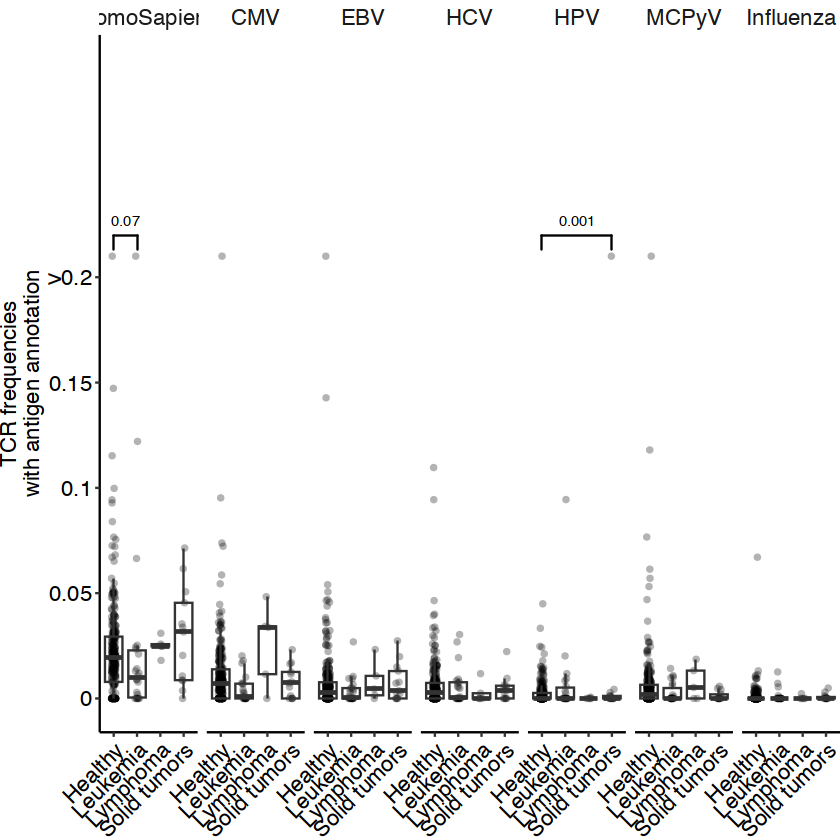

In [125]:
p_sample

In [132]:
pdf(paste0(plotpath, "antigen_fraction_all.pdf"), width = 11, height = 5)
cowplot::plot_grid(p_sample, labels = "A") #+ coord_cartesian(ylim = c(0, 0.2))
dev.off()

pdf 
  2

# Backup

### 1- Fisher test of antigen-specific motifs in pre vs post therapy CDR3s

In [ ]:
# bucket all postchemo together
samples_tcr$group <-NA
samples_tcr$group[ samples_tcr$cycle == "X01"] <- "pre"
samples_tcr$group[ samples_tcr$cycle != "X01"] <- "post"

In [ ]:
samples_tcr$group <- factor(samples_tcr$group, levels = c("pre", "post"))

In [ ]:
mymat <- as.data.frame(matrix(NA, nrow = 0, ncol = 8) )
colnames(mymat) <- c("Antigen", "Cancer","Pre", "Post", "p", "OR", "Lower", "Upper")

In [ ]:
for (c in c("Leukemia", "Lymphoma", "Solidtumors")) {
  print(c)
  pbmc <- samples_tcr[samples_tcr$sampletype == "PBMC", ]
  pbmc <- pbmc[pbmc$cancergroup == c, ]

  pbmc <- pbmc[!is.na(pbmc$group), ]

  for (v in c("CMV", "EBV", "HCV", "HPV", "Influenza", "MCPyV", "HomoSapiens")) {
    print(v)
    pbmc$Notfound <- pbmc$n_gliph - pbmc[[v]]

    contingency_table <- pbmc %>%
      group_by(group) %>%
      summarise(
        Motifs_Found = sum(eval(parse(text = v))),
        Motifs_Not_Found = sum(Notfound)
      )

    contingency_table <- as.data.frame(contingency_table)
    rownames(contingency_table) <- contingency_table$group
    contingency_table$group <- NULL
    contingency_table <- as.matrix(t(contingency_table))
    proptab <- prop.table(contingency_table, 2)

    c1 <- fisher.test(contingency_table)
    mymat_c <- as.data.frame(matrix(NA, nrow = 1, ncol = 8))
    colnames(mymat_c) <- c("Antigen", "Cancer","Pre", "Post", "p", "OR", "Lower", "Upper")

    mymat_c$Antigen[1] <- v
    mymat_c$Cancer[1] <- c
    mymat_c$Pre[1] <- proptab[1,1]
    mymat_c$Post[1] <- proptab[1,2]

    mymat_c$p[1] <- c1$p.value
    mymat_c$OR[1] <- c1$estimate
    mymat_c$Lower[1] <- c1$conf.int[1]
    mymat_c$Upper[1] <- c1$conf.int[2]
    mymat <- rbind(mymat, mymat_c[1, ])
  } # end of virus loop
} # end of cancer loop

In [ ]:
contingency_table

In [ ]:
mymat$padj <- p.adjust(mymat$p, method = "fdr")

In [ ]:
mymat[order(mymat$padj),]

In [ ]:
meta_div[meta_div$Patient == "CHP_408",]

In [ ]:
# pbmc$tmp <- pbmc$MCPyV / pbmc$n_gliph

In [ ]:
# mygliphs <- unique(tmp$pattern[ tmp$Sample %in% rownames(pbmc)[ rownames(pbmc) == "Leukemia:CHP_411_X01-cfDNA"]] )

In [ ]:
# tmp[tmp$pattern %in% mygliphs & tmp$subject == "HomoSapiens",]

### 1.1- Fisher test of antigen-specific motifs in pre vs post therapy clone counts

In [ ]:
samples_tcr_freq <- readr::read_rds( file = paste0(datapath, "GLIPH/int_samples_gliphannot_freq_stat.rds"))
gliphdf_freq <- readr::read_rds(file = paste0(datapath, "GLIPH/gliphannot_freq_stat.rds"))

In [ ]:
colnames(samples_tcr_freq)

In [ ]:
# bucket all postchemo together
samples_tcr_freq$group <-NA
samples_tcr_freq$group[ samples_tcr_freq$cycle == "X01"] <- "pre"
samples_tcr_freq$group[ samples_tcr_freq$cycle != "X01"] <- "post"

In [ ]:
samples_tcr_freq$group <- factor(samples_tcr_freq$group, levels = c("pre", "post"))

In [ ]:
mymat <- as.data.frame(matrix(NA, nrow = 0, ncol = 10) )
colnames(mymat) <- c("Antigen", "Cancer","n_pre", "n_post","Pre", "Post", "p", "OR", "Lower", "Upper")

In [ ]:
for (c in c("Leukemia", "Lymphoma", "Solidtumors")) {
  print(c)
  pbmc <- samples_tcr_freq[samples_tcr_freq$sampletype == "PBMC", ]
  pbmc <- pbmc[pbmc$cancergroup == c, ]
  pbmc <- pbmc[!is.na(pbmc$group), ]

  for (v in c("CMV", "EBV", "HCV", "HPV", "Influenza", "MCPyV", "HomoSapiens", 
      "TB", "SP", "DENV", "HTLV1", "CEF")) {
    print(v)
    pbmc$Notfound <- pbmc$cdr3_reads - pbmc[[v]]

    contingency_table <- pbmc %>%
      group_by(group) %>%
      summarise(
        Motifs_Found = sum(eval(parse(text = v))),
        Motifs_Not_Found = sum(Notfound)
      )

    contingency_table <- as.data.frame(contingency_table)
    rownames(contingency_table) <- contingency_table$group
    contingency_table$group <- NULL
    contingency_table <- as.matrix(t(contingency_table))
    proptab <- prop.table(contingency_table, 2)

    c1 <- fisher.test(contingency_table)
    mymat_c <- as.data.frame(matrix(NA, nrow = 1, ncol = 10))
    colnames(mymat_c) <- c("Antigen", "Cancer","n_pre", "n_post", "Pre", "Post", "p", "OR", "Lower", "Upper")

    mymat_c$Antigen[1] <- v
    mymat_c$Cancer[1] <- c
    mymat_c$n_pre[1] <- table(pbmc$group)[1]
    mymat_c$n_post[1] <- table(pbmc$group)[2]

    mymat_c$Pre[1] <- proptab[1,1]
    mymat_c$Post[1] <- proptab[1,2]

    mymat_c$p[1] <- c1$p.value
    mymat_c$OR[1] <- c1$estimate
    mymat_c$Lower[1] <- c1$conf.int[1]
    mymat_c$Upper[1] <- c1$conf.int[2]
    mymat <- rbind(mymat, mymat_c[1, ])
  } # end of virus loop
} # end of cancer loop

In [ ]:
mymat$padj <- p.adjust(mymat$p, method = "fdr")

In [ ]:
mymat[order(mymat$padj),]

# 3- annotated GLIPH groups between CMV- and +

In [9]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/analysis/GLIPH/run_gliph/"

50K emerson input

In [10]:
gliph_emerson <- readr::read_csv(paste0(h4hpath, "/v9_emerson/gliph_output/int_vdj_v9_emerson_cluster.csv"), col_names = T) #  Mitchel as reference

gliph_emerson <- gliph_emerson[,!grepl("HLA", colnames(gliph_emerson))]

Rows: 4177040 Columns: 29
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (17): pattern, type, TcRb, V, J, Sample, HLA-A, HLA-B, HLA-C, HLA-DPA1, ...
dbl (11): index, Fisher_score, number_subject, number_unique_cdr3, final_sco...
lgl  (1): TcRa

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
emerson <- gliph_emerson[ gliph_emerson$pattern != "single",]
emerson <- emerson[emerson$number_unique_cdr3 >= 3,]

In [12]:
emerson$subject <- gsub(":.*", "", emerson$Sample)
emerson$samplename <- gsub(".*:", "", emerson$Sample)

In [22]:
readr::write_rds(emerson, file = paste0(datapath, "GLIPH/emerson_50K_cleaned.rds"))

In [ ]:
gliphin_emerson <- readr::read_rds(paste0(h4hpath, "v9_emerson_adult/gliph_input/int_vdj_gliphinput_v9_emerson_adult.RDS"))

In [ ]:
# remove columns starting with HLA
gliphout_emerson <- gliphout_emerson[,!grepl("HLA", colnames(gliphout_emerson))]
# no single
gliphout_emerson <- gliphout_emerson[ gliphout_emerson$pattern != "single",]

In [ ]:
dim(gliphout_emerson)

[1] 119052     18

In [ ]:
gliphout_emerson$subject <- gsub(":.*", "", gliphout_emerson$Sample)

Create a gliph dataframe

In [ ]:
gliphdf <- data.frame(gliph = unique(gliphout_emerson$pattern))
rownames(gliphdf) <- gliphdf$gliph

In [ ]:
head(gliphdf)

,gliph
,<chr>
SLG%E,SLG%E
S%GGNTE,S%GGNTE
YDTG,YDTG
S%SGANV,S%SGANV
S%TGNTE,S%TGNTE
SVG%NTE,SVG%NTE


In [ ]:
head(gliphout_emerson[, c("subject", "Sample")])

,subject,Sample
,<chr>,<chr>
1,MDavis,MDavis:DRB10401
2,MDavis,MDavis:DRB10401
3,MDavis,MDavis:DRB10401
4,Emerson,Emerson:P00014_2108
5,Emerson,Emerson:P00486_45778
6,MDavis,MDavis:DRB10401


In [ ]:
names(table(gliphout_emerson$subject[!grepl("Emerson", gliphout_emerson$Sample)]))

[1] "CEF"            "CMV"            "DENV"           "EBV"           
 [5] "HCV"            "HPV"            "HomoSapiens"    "Influenza"     
 [9] "M.tuberculosis" "MCPyV"          "MDavis"         "S-pneumoniae"

In [ ]:
for(i in 1:nrow(gliphdf)){

mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i],]
# add gliphdf$CMV, if mygliph$subject ciontains CMV
gliphdf$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(grepl("CMV", mygliph$subject)), 0)
gliphdf$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(grepl("EBV", mygliph$subject)), 0)
gliphdf$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(grepl("HCV", mygliph$subject)), 0)
gliphdf$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(grepl("Influenza", mygliph$subject)), 0)
gliphdf$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(grepl("HomoSapiens", mygliph$subject)), 0)
gliphdf$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(grepl("MDavis", mygliph$subject)), 0)
gliphdf$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(grepl("HPV", mygliph$subject)), 0)
gliphdf$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(grepl("CEF", mygliph$subject)), 0)
gliphdf$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(grepl("M.tuberculosis", mygliph$subject)), 0)
gliphdf$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(grepl("MCPyV", mygliph$subject)), 0)
gliphdf$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(grepl("S-pneumoniae", mygliph$subject)), 0)
gliphdf$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(grepl("DENV", mygliph$subject)), 0)
}

In [ ]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0


In [ ]:
colnames(gliphout_emerson)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [ ]:
# add number of unique cdr3s for each group
for (i in 1:nrow(gliphdf)) {
    mygliph <- gliphout_emerson[gliphout_emerson$pattern == gliphdf$gliph[i], ]
    gliphdf$n_unique_cdr3[i] <- mygliph$number_unique_cdr3[1]
}


In [ ]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


Create samples x gliph dataframe

In [ ]:
gliphout_emerson$Sample <- gsub("_.*", "", gliphout_emerson$Sample)

In [ ]:
mysamples <- names(table(gliphout_emerson$Sample[grepl("Emerson", gliphout_emerson$Sample)]))

In [ ]:
head(mysamples)

[1] "Emerson:P00001" "Emerson:P00002" "Emerson:P00004" "Emerson:P00005"
[5] "Emerson:P00006" "Emerson:P00008"

In [ ]:
colnames(gliphdf)[2:14]

[1] "CMV"           "EBV"           "HCV"           "Influenza"    
 [5] "HomoSapiens"   "MDavis"        "HPV"           "CEF"          
 [9] "TB"            "MCPyV"         "SP"            "DENV"         
[13] "n_unique_cdr3"

In [ ]:
samples_tcr <- as.data.frame(matrix(0, nrow = length(mysamples), ncol = 12, 
dimnames = list(mysamples, colnames(gliphdf)[2:13])) ) 

In [ ]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00001,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00002,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00004,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00005,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00008,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# count number of TCRs with annotated gliph groups for each sample
# # eg if 3 TCRs are annotated to a one gliph group with HPV annotation, then count it as 3
for (i in 1:nrow(samples_tcr)) {
    samplegliphs <- gliphout_emerson$pattern[gliphout_emerson$Sample == rownames(samples_tcr)[i]]
    mytab <- as.data.frame(table(gliphout_emerson$subject[gliphout_emerson$pattern %in% samplegliphs]), stringsAsFactors = F)
    mycols <- intersect(colnames(samples_tcr), mytab$Var1)
    samples_tcr[i, mycols] <- mytab$Freq[match(mycols, mytab$Var1)]
}

In [ ]:
# # count number of annotated gliph groups for each sample
# for (i in 1:nrow(gliphdf)) {
#     mygliph <- gliphout_emerson[gliphout_emerson$pattern == rownames(gliphdf)[i], ]
#     sample_subject_tab <- as.data.frame.matrix(table(mygliph$Sample, mygliph$subject))
#     if (sum(grepl("Emerson", rownames(sample_subject_tab))) > 0) {
#         # subset to  samples
#         sample_subject_tab <- sample_subject_tab[grepl("Emerson", rownames(sample_subject_tab)), ]
#         # select same samples in samples_tcr, then match colnames
#         samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] <-
#             samples_tcr[rownames(sample_subject_tab), which(colnames(samples_tcr) %in% colnames(sample_subject_tab))] + 1
#     }
# }


In [ ]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0


In [ ]:
gliphin_emerson$subject <- gsub("_.*", "", gliphin_emerson$subject.condition)

In [ ]:
head(gliphin_emerson)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
1,CAAAGGSYEQYF,TRBV6-8,NA,NA,MDavis:B5101,1,MDavis:B5101
2,CAAAGTSTDTQYF,TRBV6-8,NA,NA,MDavis:C0602_DRB11501,1,MDavis:C0602
3,CAAAGYDEKLFF,TRBV9-1,NA,NA,MDavis:DQA10102,1,MDavis:DQA10102
4,CAAGGMNTEAFF,TRBV30-1,NA,NA,MDavis:A3101_DQA10301_DRB10701,1,MDavis:A3101
5,CAAGQEGTDTQYF,TRBV29-1,NA,NA,MDavis:B0702_C0702,1,MDavis:B0702
6,CAAGRGLNTEAFF,TRBV29-1,NA,NA,MDavis:B3501_C0401_DRB11501,1,MDavis:B3501


In [ ]:
gliphin_emerson_samples <- gliphin_emerson[ grepl("Emerson", gliphin_emerson$subject),]

In [ ]:
head(gliphin_emerson_samples)

,CDR3b,TRBV,TRBJ,CDR3a,subject.condition,count,subject
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>
21816,CASSRGQGPYEQYF,TRBV06-05,TRBJ02-07,NA,Emerson:P00001_1,39,Emerson:P00001
21817,CAISPASPRGPSTDTQYF,TRBV28-01,TRBJ02-03,NA,Emerson:P00001_2,85,Emerson:P00001
21818,CASSFQDRGRNEQFF,TRBV07-06,TRBJ02-01,NA,Emerson:P00001_3,46,Emerson:P00001
21819,CASSRDRVQETQYF,TRBV06-05,TRBJ02-05,NA,Emerson:P00001_4,53,Emerson:P00001
21820,CASSPGQGYEQYF,TRBV12,TRBJ02-07,NA,Emerson:P00001_5,61,Emerson:P00001
21821,CASSLVTGAGTEAFF,TRBV05-04,TRBJ01-01,NA,Emerson:P00001_6,94,Emerson:P00001


In [ ]:
mytab <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(n = n())
mytab1 <- gliphin_emerson_samples %>% group_by(subject) %>% summarise(SumCount = sum(count))


In [ ]:
head(mytab1)

subject,SumCount
<chr>,<dbl>
Emerson:P00001,30394
Emerson:P00002,1940
Emerson:P00004,48734
Emerson:P00005,8595
Emerson:P00006,222
Emerson:P00008,5723


In [ ]:
samples_tcr$n_cdr3 <- mytab$n[ match(rownames(samples_tcr), mytab$subject) ]
samples_tcr$cdr3_reads <- mytab1$SumCount[ match(rownames(samples_tcr), mytab1$subject) ]

In [ ]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723


In [ ]:
# get the matrix of GLIPH x samples
pat_type <- as.data.frame.matrix(table(gliphout_emerson %>% select(pattern, Sample)))

In [ ]:
pat_type <- pat_type[, grepl("Emerson", colnames(pat_type))]

In [ ]:
head(pat_type)

,Emerson:P00001,Emerson:P00002,Emerson:P00004,Emerson:P00005,Emerson:P00006,Emerson:P00008,Emerson:P00009,Emerson:P00011,Emerson:P00013,Emerson:P00014,...,Emerson:P00626,Emerson:P00628,Emerson:P00636,Emerson:P00639,Emerson:P00647,Emerson:P00649,Emerson:P00650,Emerson:P00654,Emerson:P00656,Emerson:P00665
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
%AAGYG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%AANEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
%AAQET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%ADRLNTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%ADSGNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
%ADT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pat_type[ pat_type > 0] <- 1 # sometimes for one sample there are two CDR3s grouped in one cluster, recode to 1 to count once

In [ ]:
# fill n_gliph for each samples
n_gliph <- colSums(pat_type)

In [ ]:
samples_tcr$n_gliph <- n_gliph[ match(rownames(samples_tcr), names(n_gliph)) ]

In [ ]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394,333
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940,73
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734,521
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595,193
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723,276


In [ ]:
head(gliphout_emerson$Sample)

[1] "MDavis:DRB10401" "MDavis:DRB10401" "MDavis:DRB10401" "Emerson:P00014" 
[5] "Emerson:P00486"  "MDavis:DRB10401"

In [ ]:
# get number of unique cdr3s used in gliph for each sample
samples_tcr$n_cdr3ingliph <- NA
samples_tcr$cdr3reads_ingliph <- NA
for (i in 1:nrow(samples_tcr)) {
    mysample <- gliphout_emerson[gliphout_emerson$Sample == rownames(samples_tcr)[i], ]
    samples_tcr$n_cdr3ingliph[i] <- length(unique(mysample$TcRb))
    samples_tcr$cdr3reads_ingliph[i] <- sum(mysample$Freq)
}

In [ ]:
head(samples_tcr)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314,30394,333,150,33353
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82,1940,73,36,1637
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504,48734,521,215,63165
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205,8595,193,97,6399
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252,5723,276,117,5759


In [ ]:
samples_tcr$study <- "Emerson_adult"

In [ ]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


In [ ]:
readr::write_rds(samples_tcr, file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_stat.rds"))
readr::write_rds(gliphdf, file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_stat.rds"))

In [ ]:
# check a sample
samples_tcr[10,]

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00014,3,3,4,0,15,881,1,0,0,4,0,0,500,26315,512,231,26278,Emerson_adult


In [ ]:
temp <- gliphin_emerson[ gliphin_emerson$subject == "Emerson:P00014",]
sum(temp$count) # cdr3_reads
length(unique(temp$CDR3b)) # n_cdr3

temp <- gliphout_emerson[ gliphout_emerson$Sample == "Emerson:P00014",]
sum(temp$Freq) # cdr3reads_ingliph
length(unique(temp$TcRb)) # n_cdr3ingliph

[1] 26315

[1] 500

[1] 26278

[1] 231

In [ ]:
samplegliphs <- gliphout_emerson$pattern[ gliphout_emerson$Sample == "Emerson:P00014"]
table(gliphout_emerson$subject[ gliphout_emerson$pattern %in% samplegliphs])


         CMV          EBV      Emerson          HCV          HPV  HomoSapiens 
           3            3         2025            4            1           15 
       MCPyV       MDavis S-pneumoniae 
           4          881            2 

Create summary tables for frequencies

In [ ]:
gliphout <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_cleaned.rds"))

In [ ]:
# use the previous data
samples_tcr <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_stat.rds"))
gliphdf <- readr::read_rds(file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_stat.rds"))

In [ ]:
gliphdf_freq <- gliphdf %>% mutate_all(~NA)
gliphdf_freq$n_unique_cdr3 <- NULL
gliphdf_freq$gliph <- NULL

In [ ]:
head(samples_tcr[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00001,1,1,2,0,7,403,2,0,0,3,0,0,314
Emerson:P00002,2,1,1,0,1,111,0,0,0,0,0,0,82
Emerson:P00004,6,5,4,7,19,667,1,0,0,3,0,0,504
Emerson:P00005,3,0,1,0,1,337,0,0,0,3,0,0,205
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3
Emerson:P00008,3,4,6,0,9,439,0,0,0,0,0,0,252


In [ ]:
columns_to_na <- colnames(samples_tcr)[1:12]

samples_tcr_freq <- samples_tcr %>%
  mutate(across(all_of(columns_to_na), ~NA))

In [ ]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,222,1,1,68,Emerson_adult
Emerson:P00008,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,5723,276,117,5759,Emerson_adult


In [ ]:
names(table(gliphout$subject[!grepl("Emerson", gliphout$Sample)]))

[1] "CEF"            "CMV"            "DENV"           "EBV"           
 [5] "HCV"            "HPV"            "HomoSapiens"    "Influenza"     
 [9] "M.tuberculosis" "MCPyV"          "MDavis"         "S-pneumoniae"

In [ ]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
SLG%E,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%GGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
YDTG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%SGANV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
S%TGNTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SVG%NTE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
for(i in 1:nrow(gliphdf_freq)){

mygliph <- gliphout[gliphout$pattern == rownames(gliphdf_freq)[i],]
# sum Freq of CHP samples if  if mygliph$Sample ciontains CMV
gliphdf_freq$CMV[i] <- ifelse(sum(grepl("CMV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$EBV[i] <- ifelse(sum(grepl("EBV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$HCV[i] <- ifelse(sum(grepl("HCV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$Influenza[i] <- ifelse(sum(grepl("Influenza", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HomoSapiens[i] <- ifelse(sum(grepl("HomoSapiens", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MDavis[i] <- ifelse(sum(grepl("MDavis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)

gliphdf_freq$HPV[i] <- ifelse(sum(grepl("HPV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$CEF[i] <- ifelse(sum(grepl("CEF", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$TB[i] <- ifelse(sum(grepl("M.tuberculosis", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$MCPyV[i] <- ifelse(sum(grepl("MCPyV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
gliphdf_freq$SP[i] <- ifelse(sum(grepl("S-pneumoniae", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
# gliphdf_freq$HTLV1[i] <- ifelse(sum(grepl("HTLV-1", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("CHP", mygliph$Sample)]), 0)
gliphdf_freq$DENV[i] <- ifelse(sum(grepl("DENV", mygliph$subject)) > 0, sum(mygliph$Freq[grepl("Emerson", mygliph$Sample)]), 0)
}

In [ ]:
head(gliphdf)

,gliph,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_unique_cdr3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SLG%E,SLG%E,0,0,0,0,0,39,0,0,0,0,0,0,53
S%GGNTE,S%GGNTE,0,0,0,0,1,40,0,0,0,0,0,0,42
YDTG,YDTG,0,0,0,0,0,75,0,0,0,0,0,0,78
S%SGANV,S%SGANV,0,0,0,0,0,34,0,0,0,0,0,0,36
S%TGNTE,S%TGNTE,0,0,0,0,0,34,0,0,0,0,0,0,35
SVG%NTE,SVG%NTE,0,0,0,0,0,28,0,0,0,0,0,0,31


In [ ]:
head(gliphdf_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLG%E,0,0,0,0,0,1935,0,0,0,0,0,0
S%GGNTE,0,0,0,0,1027,1027,0,0,0,0,0,0
YDTG,0,0,0,0,0,124,0,0,0,0,0,0
S%SGANV,0,0,0,0,0,1147,0,0,0,0,0,0
S%TGNTE,0,0,0,0,0,1347,0,0,0,0,0,0
SVG%NTE,0,0,0,0,0,705,0,0,0,0,0,0


In [ ]:
colnames(gliphout)

[1] "index"              "pattern"            "Fisher_score"      
 [4] "number_subject"     "number_unique_cdr3" "final_score"       
 [7] "hla_score"          "vb_score"           "expansion_score"   
[10] "length_score"       "cluster_size_score" "type"              
[13] "TcRb"               "V"                  "J"                 
[16] "TcRa"               "Sample"             "Freq"              
[19] "subject"

In [ ]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,222,1,1,68,Emerson_adult
Emerson:P00008,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,252,5723,276,117,5759,Emerson_adult


In [ ]:
colnames(gliphdf_freq)
colnames(samples_tcr_freq)

[1] "CMV"         "EBV"         "HCV"         "Influenza"   "HomoSapiens"
 [6] "MDavis"      "HPV"         "CEF"         "TB"          "MCPyV"      
[11] "SP"          "DENV"

[1] "CMV"               "EBV"               "HCV"              
 [4] "Influenza"         "HomoSapiens"       "MDavis"           
 [7] "HPV"               "CEF"               "TB"               
[10] "MCPyV"             "SP"                "DENV"             
[13] "n_cdr3"            "cdr3_reads"        "n_gliph"          
[16] "n_cdr3ingliph"     "cdr3reads_ingliph" "study"

In [ ]:
gliphout$sample_id <- gsub("_.*", "", gliphout$Sample)

In [ ]:
myantigens <- c('CMV','EBV','HCV','Influenza','HomoSapiens','MDavis','HPV','CEF','TB','MCPyV','SP','DENV')
# count number of annotated gliph groups for each sample
for (i in 1:nrow(samples_tcr_freq)) {
    mysample <- gliphout[gliphout$sample_id == rownames(samples_tcr_freq)[i], ]
    for (a in myantigens) {
        tmp <- gliphout[gliphout$pattern %in% mysample$pattern, ] # subset to include patterns in my sample
        antigen_gliphs <- tmp$pattern[grepl(a, tmp$subject)] # get antigen gliphs
        samples_tcr_freq[i, a] <- sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])
    }
}


In [ ]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68,Emerson_adult
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252,5723,276,117,5759,Emerson_adult


In [ ]:
# Replace NA values with 0 in columns
columns_to_fill <- colnames(samples_tcr_freq)[1:12]

samples_tcr_freq[columns_to_fill] <- lapply(samples_tcr_freq[columns_to_fill], function(x) ifelse(is.na(x), 0, x))


In [ ]:
head(samples_tcr_freq[,1:13])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252


In [ ]:
table(samples_tcr_freq$study)


Emerson_adult 
          253 

In [ ]:
readr::write_rds(samples_tcr_freq, file = paste0(datapath, "GLIPH/emerson_adult_samples_gliphannot_freq_stat.rds"))
readr::write_rds(gliphdf_freq, file = paste0(datapath, "GLIPH/emerson_adult_gliphannot_freq_stat.rds"))

In [ ]:
(gliphdf_freq["STG%YG",])

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STG%YG,115,0,0,115,0,115,0,0,0,0,0,0


In [ ]:
# sanity check
table(gliphout_emerson$subject[gliphout_emerson$pattern == "STG%YG"])
emerson <- gliphout_emerson$Sample[grepl("Emerson", gliphout_emerson$Sample)]
sum(gliphout_emerson$Freq[gliphout_emerson$pattern == "STG%YG" & gliphout_emerson$Sample %in% emerson])
sum(gliphout_emerson$Freq[gliphout_emerson$pattern == "STG%YG"])


      CMV   Emerson Influenza    MDavis 
        1         3         2         6 

[1] 115

[1] 124

In [ ]:
head(samples_tcr_freq)

,CMV,EBV,HCV,Influenza,HomoSapiens,MDavis,HPV,CEF,TB,MCPyV,SP,DENV,n_cdr3,cdr3_reads,n_gliph,n_cdr3ingliph,cdr3reads_ingliph,study
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Emerson:P00001,227,364,427,0,327,12546,465,0,0,100,0,0,314,30394,333,150,33353,Emerson_adult
Emerson:P00002,46,18,25,0,19,894,0,0,0,0,0,0,82,1940,73,36,1637,Emerson_adult
Emerson:P00004,432,274,249,465,1146,39163,70,0,0,226,0,0,504,48734,521,215,63165,Emerson_adult
Emerson:P00005,102,0,23,0,21,3000,0,0,0,67,0,0,205,8595,193,97,6399,Emerson_adult
Emerson:P00006,0,0,0,0,0,0,0,0,0,0,0,0,3,222,1,1,68,Emerson_adult
Emerson:P00008,37,82,127,0,277,2974,0,0,0,0,0,0,252,5723,276,117,5759,Emerson_adult


In [ ]:
# sanity check
mysample <- gliphout_emerson[gliphout_emerson$Sample == "Emerson:P00008", ]
tmp <- gliphout_emerson[gliphout_emerson$pattern %in% mysample$pattern, ] 
antigen_gliphs <- tmp$pattern[grepl("HCV", tmp$subject)]
sum(mysample$Freq[mysample$pattern %in% antigen_gliphs])

[1] 127

In [13]:
dim(emerson)

[1] 3178878      20

In [14]:
head(table(emerson$subject, useNA = "ifany"))


    CEF     CMV    DENV     EBV Emerson     HCV 
      4     536       2     580 3097388     191 

In [15]:
allAdaptive <- readr::read_rds(file = paste0(datapath, "Adaptivedatasets/allAdaptive_good.rds"))
emerson_meta <- allAdaptive[ allAdaptive$study == "Emerson",]

CMVneg <- emerson_meta$sample_name[which(emerson_meta$disease == "Cytomegalovirus -")]
CMVpos <- emerson_meta$sample_name[which(emerson_meta$disease == "Cytomegalovirus +")]

In [16]:
head(emerson)

index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Sample,Freq,subject,samplename
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV12,TRBJ01-01,NA,Emerson:P00378,31,Emerson,P00378
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV19-01,TRBJ01-01,NA,Emerson:P00307,10,Emerson,P00307
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV05-05,TRBJ01-01,NA,Emerson:P00332,26,Emerson,P00332
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV19-01,TRBJ01-01,NA,Emerson:P00171,19,Emerson,P00171
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV12,TRBJ01-01,NA,Emerson:P00340,69,Emerson,P00340
1,R%NTE,6.3e-30,2,131,4.2e-11,1,0.023,0.18,0.001,1e-05,global-R%NTE,CASRWNTEAFF,TRBV27-01,TRBJ01-01,NA,Emerson:P00564,30,Emerson,P00564


In [19]:
importantgliphs <- emerson$pattern[ emerson$samplename %in% c(CMVneg, CMVpos)]
emerson_gliphs <- emerson[ emerson$pattern %in% importantgliphs,]

In [20]:
mytab <- as.data.frame.matrix(table(emerson_gliphs$pattern, emerson_gliphs$subject))

In [21]:
head(mytab)

,CEF,CMV,DENV,EBV,Emerson,HCV,HPV,HTLV-1,HomoSapiens,Influenza,M.tuberculosis,MCPyV,MDavis,S-pneumoniae
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
%A,0,0,0,0,23,0,0,0,1,0,0,0,0,0
%AADG,0,0,0,0,3,0,0,0,0,0,0,0,0,0
%AADNQP,0,0,0,0,3,0,0,0,0,0,0,0,0,0
%AADT,0,0,0,0,19,0,0,0,0,0,0,0,0,0
%AADTE,0,0,0,0,4,0,0,0,0,0,0,0,0,0
%AAE,0,0,0,0,12,0,0,0,0,0,0,0,0,0


In [ ]:
# count each group once per gliph
mytab_1 <- mytab
mytab_1[mytab_1 > 1] <- 1

In [ ]:
n_anno <- colSums(mytab_1 > 0)

In [ ]:
head(n_anno)

In [ ]:
gliphinput <- read.table(paste0(h4hpath, "/Emerson/gliphinput_emerson_vdj_mdv.txt"), sep = "\t" ,header = F) #  Mitchel as reference

In [ ]:
colnames(gliphinput) <- c("CDR3b","TRBV","TRBJ","CDR3a","subject:condition","count")

In [ ]:
gliphinput$subject <- gsub(".*:", "", gliphinput$`subject:condition`)

In [ ]:
head(gliphinput)

In [ ]:
gliphinput$disease <- emerson_meta$disease[match(gliphinput$subject, emerson_meta$sample_name)]

In [ ]:
head(gliphinput)

In [ ]:
table(gliphinput$disease)

In [ ]:
base_rate_CMVneg <- n_anno / length(unique(gliphinput$CDR3b[ grepl("Cytomegalovirus -", gliphinput$disease)]))
base_rate_CMVpos <- n_anno / length(unique(gliphinput$CDR3b[ grepl("Cytomegalovirus +", gliphinput$disease)]))

# base_rate <- n_anno / length(unique(gliphinput$CDR3b[ grepl("Emerson", gliphinput$`subject:condition`)]))

In [ ]:
base_rate <- base_rate_CMVneg

In [ ]:
base_rate_CMVneg

base_rate_CMVpos

### 2.1- sample probablities of finding a viral group

In [ ]:
samples_tcr_probs <- samples_tcr

In [ ]:
head(samples_tcr_probs)

In [ ]:
samples_tcr_probs$Viral <- rowSums(samples_tcr_probs[, c("CMV", "EBV", "HCV", "Influenza", "HPV", "MCPyV")], na.rm = TRUE)

In [ ]:
head(samples_tcr_probs)

In [ ]:
base_rate

In [ ]:
samples_tcr_probs$Myp <- NA
for (i in 1:nrow(samples_tcr_probs)) {
    samples_tcr_probs$Myp[i] <- binom.test(x = samples_tcr_probs$MCPyV[i], n = samples_tcr_probs$n_gliph[i], 
    p = base_rate["MCPyV"], alternative = "greater")$p.value
}

samples_tcr_probs$HSapiens <- NA
for (i in 1:nrow(samples_tcr_probs)) {
    samples_tcr_probs$HSapiens[i] <- binom.test(x = samples_tcr_probs$HomoSapiens[i], n = samples_tcr_probs$n_gliph[i], 
    p = base_rate[ "HomoSapiens"], alternative = "greater")$p.value
}

In [ ]:
samples_tcr_probs$Relapse <- meta_div$Relapse[match(rownames(samples_tcr_probs), meta_div$samplename)]

In [ ]:
samples_tcr_probs$MCPyV_ratio <- samples_tcr_probs$MCPyV / samples_tcr_probs$n_gliph
samples_tcr_probs$HomoSapiens_ratio <- samples_tcr_probs$HomoSapiens / samples_tcr_probs$n_gliph

In [ ]:
pbmc <- samples_tcr_probs[ samples_tcr_probs$sampletype == "cfDNA",]

In [ ]:
ggplot(data = pbmc, aes( x = HomoSapiens_ratio, y = -log10(HSapiens))) + geom_point()

In [ ]:
tempo <- pbmc[ pbmc$cycle != "X01" & pbmc$cancergroup == "Solidtumors", ] %>% group_by(Patient) %>% reframe( sump = mean(psuccess), rel = Relapse, p = mean(Myp) )

In [ ]:
tempo_dedup <- tempo[ !duplicated(tempo$Patient), ]

In [ ]:
tempo

In [ ]:
f <- as.formula(paste0("rel~", "sump"))

lrmodel <- glm(f, data = tempo[ !duplicated(tempo$Patient), ], family = "binomial")

summary(lrmodel)


## 2.2 - Binomial probablities of finding at least one motif in a sample

In [ ]:
samples_tcr_probs$CMVp <- 1 - (1 - base_rate["CMV"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$EBVp <- 1 - (1 - base_rate["EBV"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$Flup <- 1 - (1 - base_rate["Influenza"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$HCVp <- 1 - (1 - base_rate["HCV"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$HPVp <- 1 - (1 - base_rate["HPV"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$CEFp <- 1 - (1 - base_rate["CEF"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$HSp <- 1 - (1 - base_rate["HomoSapiens"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$MCPyVp <- 1 - (1 - base_rate["MCPyV"]) ^ samples_tcr_probs$n_cdr3
samples_tcr_probs$MDavisp <- 1 - (1 - base_rate["MDavis"]) ^ samples_tcr_probs$n_cdr3

In [ ]:
head(samples_tcr_probs)

In [ ]:
pbmc <- samples_tcr_probs[ samples_tcr_probs$sampletype == "PBMC",]

In [ ]:
pairwise.t.test(pbmc[ pbmc$cycle == "X01", "Influenza"], pbmc$cancergroup[ pbmc$cycle == "X01"], "none")

In [ ]:
colnames(pbmc)

In [ ]:
myfit <- lmerTest::lmer( EBVp ~ cyclenum + Age + (1 | Patient), data= pbmc[pbmc$cancergroup == "Solidtumors",])


In [ ]:
anova(myfit)